## 모듈 설치

In [3]:
import warnings
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import set_matplotlib_hangul

warnings.filterwarnings('ignore')

Hangul OK in your Windows!!


---

## 데이터 시각적 탐색(EDA)

### 신용등급을 기준으로 한 분포 - 범주형 변수

In [29]:
# 데이터 불러오기
train = pd.read_csv('../data/신용카드/train.csv', index_col=0)
test = pd.read_csv('../data/신용카드/test.csv', index_col=0)

In [5]:
train.tail(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


- 컬럼을 살펴보면 income_total, days_birth, days_employed, begin_month, child_num, family_size는 확실하게 연속형 변수로 취급할 수 있을 것 같다.
- 위의 연속형 변수들을 제외하고 일단 먼저 범주형 변수의 신용등급별 분포를 살펴봐야겠다.

In [6]:
# 신용등급별 count
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

#### 신용등급별 전체 비율

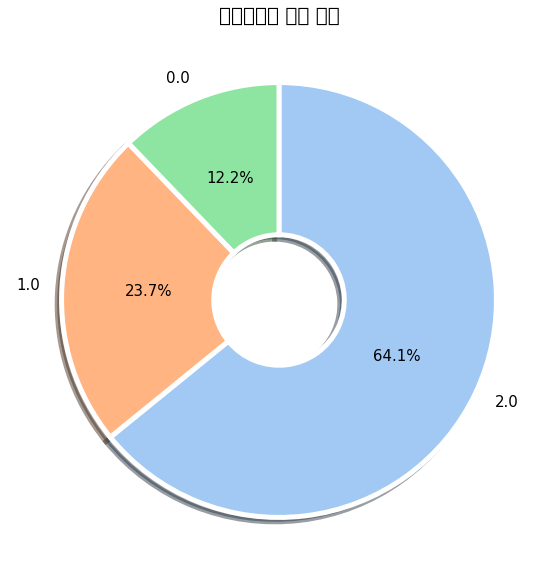

In [7]:
ratio = train['credit'].value_counts()
labels = train['credit'].value_counts().index

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors, shadow=True, wedgeprops=wedgeprops, textprops={'fontsize': 15})
plt.title('신용등급별 분포 비율', size=20)
plt.show()

- 0등급이 전체의 12.2%, 1등급 23.7%, 2등급 64.1%를 차지하였다.
- 전체 데이터의 절반이상이 낮은 신용도를 가지고 있는 것을 볼 수 있다.

In [8]:
# 시각화를 위한 신용등급 별 데이터 분할
credit_0 = train[train['credit']==0.0]
credit_1 = train[train['credit']==1.0]
credit_2 = train[train['credit']==2.0]

In [9]:
# 신용등급별 범주형 컬럼의 비율을 파이 차트로 시각화 하기 위한 함수
def draw_cat_pie(column):
    f, ax = plt.subplots(1, 3, figsize=(30, 20))

    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    colors = sns.color_palette('Set2')

    credit_0[column].value_counts().plot.pie(autopct='%.1f%%', ax=ax[0], textprops={'fontsize': 15},
                                               startangle=90, counterclock=False, 
                                               colors=colors, shadow=True, wedgeprops=wedgeprops)
    ax[0].set_title('credit=0인 {} ratio'.format(column), size=20)
    ax[0].set_ylabel('')
    
    credit_1[column].value_counts().plot.pie(autopct='%.1f%%', ax=ax[1], textprops={'fontsize': 15},
                                               startangle=90, counterclock=False, 
                                               colors=colors, shadow=True, wedgeprops=wedgeprops)
    ax[1].set_title('credit=1인 {} ratio'.format(column), size=20)
    ax[1].set_ylabel('')
    
    credit_2[column].value_counts().plot.pie(autopct='%.1f%%', ax=ax[2], textprops={'fontsize': 15},
                                               startangle=90, counterclock=False, 
                                               colors=colors, shadow=True, wedgeprops=wedgeprops)
    ax[2].set_title('credit=2인 {} ratio'.format(column), size=20)
    ax[2].set_ylabel('')
    
    plt.show()

In [10]:
# 신용등급별 범주형 컬럼을 바 차트로 시각화 하기 위한 함수
def draw_cat_bar(column):

  f, ax = plt.subplots(1, 3, figsize=(30, 8))


  sns.countplot(y = column,
                data = credit_0,
                ax = ax[0],
                palette='Set2',
                order = credit_0[column].value_counts().index)
  ax[0].tick_params(labelsize=15)
  ax[0].set_title('credit=0인 {} count'.format(column), size=20)
  ax[0].set_xlabel('count', size=15)
  ax[0].set_ylabel('')

  sns.countplot(y = column,
                data = credit_1,
                ax = ax[1],
                palette='Set2',
                order = credit_1[column].value_counts().index)
  ax[1].tick_params(labelsize=15)
  ax[1].set_title('credit=1인 {} count'.format(column), size=20)
  ax[1].set_xlabel('count', size=15)  
  ax[1].set_ylabel('')

  sns.countplot(y = column,
                data = credit_2,
                ax = ax[2],
                palette='Set2',
                order = credit_2[column].value_counts().index)
  ax[2].tick_params(labelsize=15)  
  ax[2].set_title('credit=2인 {} count'.format(column), size=20)
  ax[2].set_xlabel('count', size=15)
  ax[2].set_ylabel('')
    
  plt.subplots_adjust(wspace=0.6, hspace=0.3)
  plt.show()

In [11]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

#### 신용등급 별 성별 분포

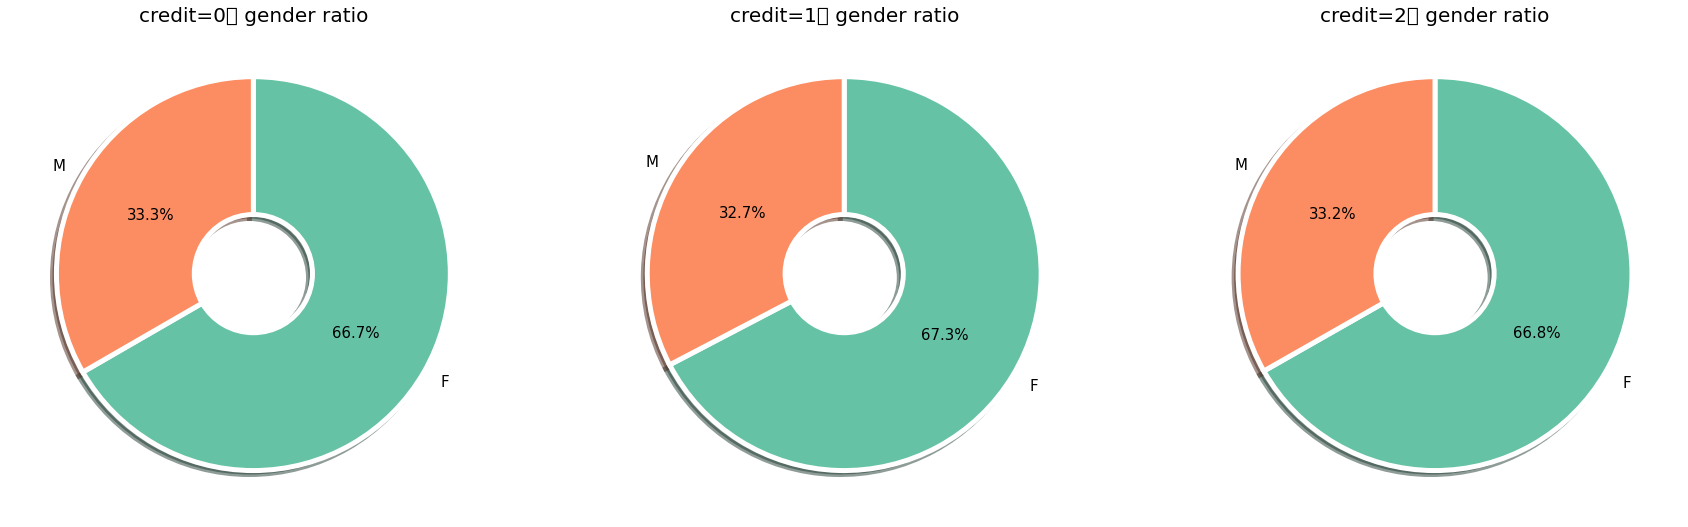

In [12]:
draw_cat_pie('gender')

- 모든 신용등급에서 전체적으로 여성이 남성에 비해 약 2배 가량 더 많았다.

#### 신용등급 별 자동차 소유 분포

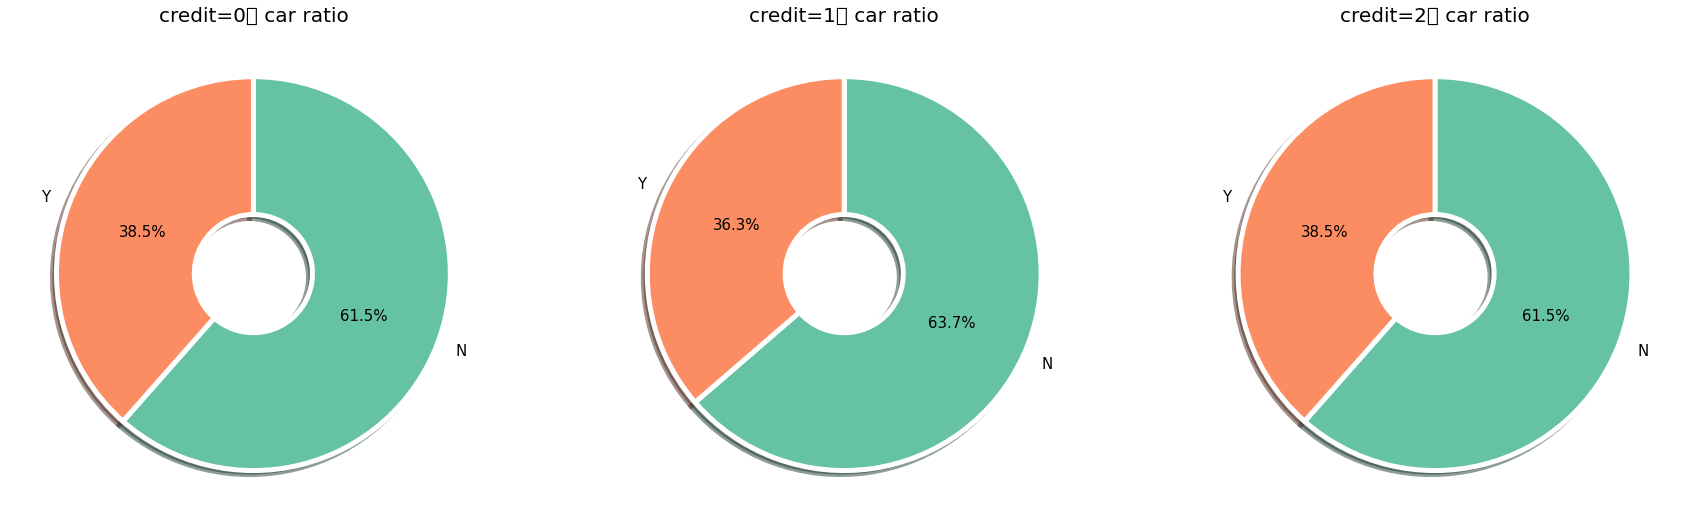

In [13]:
draw_cat_pie('car')

- 신용등급 여부와 상관없이 전체적으로 차량을 소유하지 않은 사람들이 차량을 소유한 사람보다 더 많았다

#### 신용등급 별 부동산 소유 여부 분포

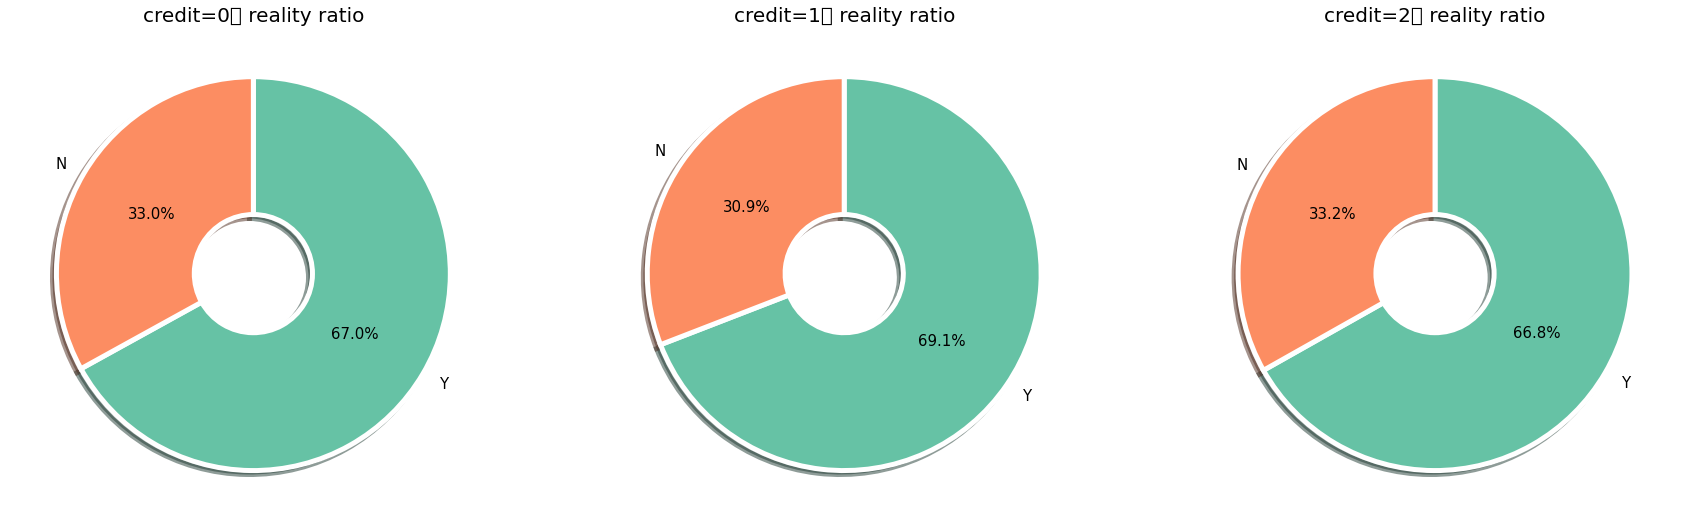

In [14]:
draw_cat_pie('reality') # reality: 부동산 소유 여부

- 부동산 소유 여부도 마찬가지로 신용등급 여부와 상관없이 전체적으로 부동산을 소유하지 않은 사람보다 소유한 사람이 더 많았다.

#### 신용등급 별 소득분류 분포

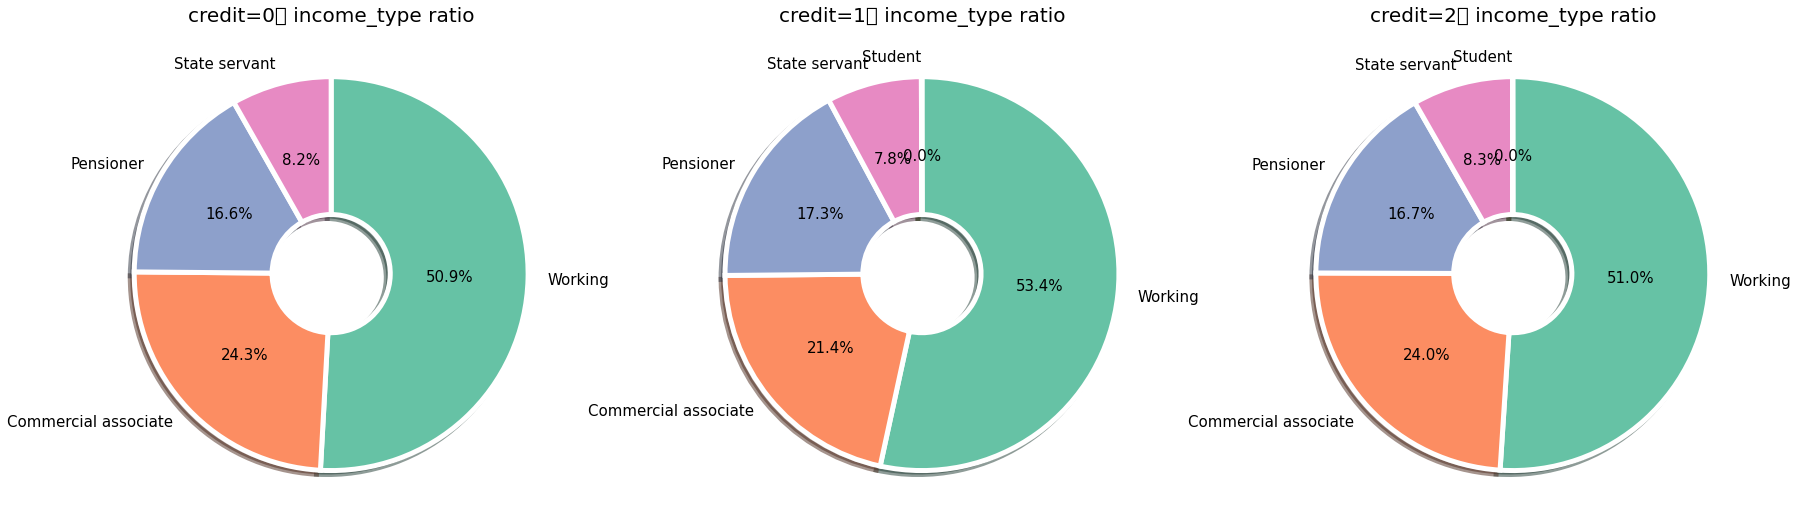

In [15]:
draw_cat_pie('income_type')

- Commercial associate는 상업 영업 사원으로 회사의 대표자를 의미한다는데 자세한 것은 추후 과정을 진행하면서 더 알아가보자.
- Pensioner은 연금 수령자이며, State servant는 주를 위해 일하는 사람으로 공무원으로 해석하면 될 것 같다.
- Working은 노동자, 즉 일반적인 회사원 혹은 근로자라고 봐야 될 것 같다.
- 신용등급별로 분포가 비슷하게 되어있으며 특이사항으로는 소득분류의 절반은 근로자이며 학생이 거의 존재하지 않는다.

In [16]:
credit_1['income_type'].value_counts(), credit_2['income_type'].value_counts()

(Working                 3347
 Commercial associate    1344
 Pensioner               1084
 State servant            489
 Student                    3
 Name: income_type, dtype: int64,
 Working                 8659
 Commercial associate    4076
 Pensioner               2829
 State servant           1400
 Student                    4
 Name: income_type, dtype: int64)

- credit=1, credit=2에서의 각각 3명, 4명의 학생도 존재한다는 것을 알 수 있다.
- 하지만 상대적으로 높은 신용등급인 credit=0에서는 학생이 존재하지 않는 다는 것을 볼 수 있으며
- 보편적으로 소득이 있는 학생이 거의 없기 때문에 높은 신용을 가질 수 없다.

#### 신용등급 별 교육수준 분포

In [17]:
train.edu_type.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

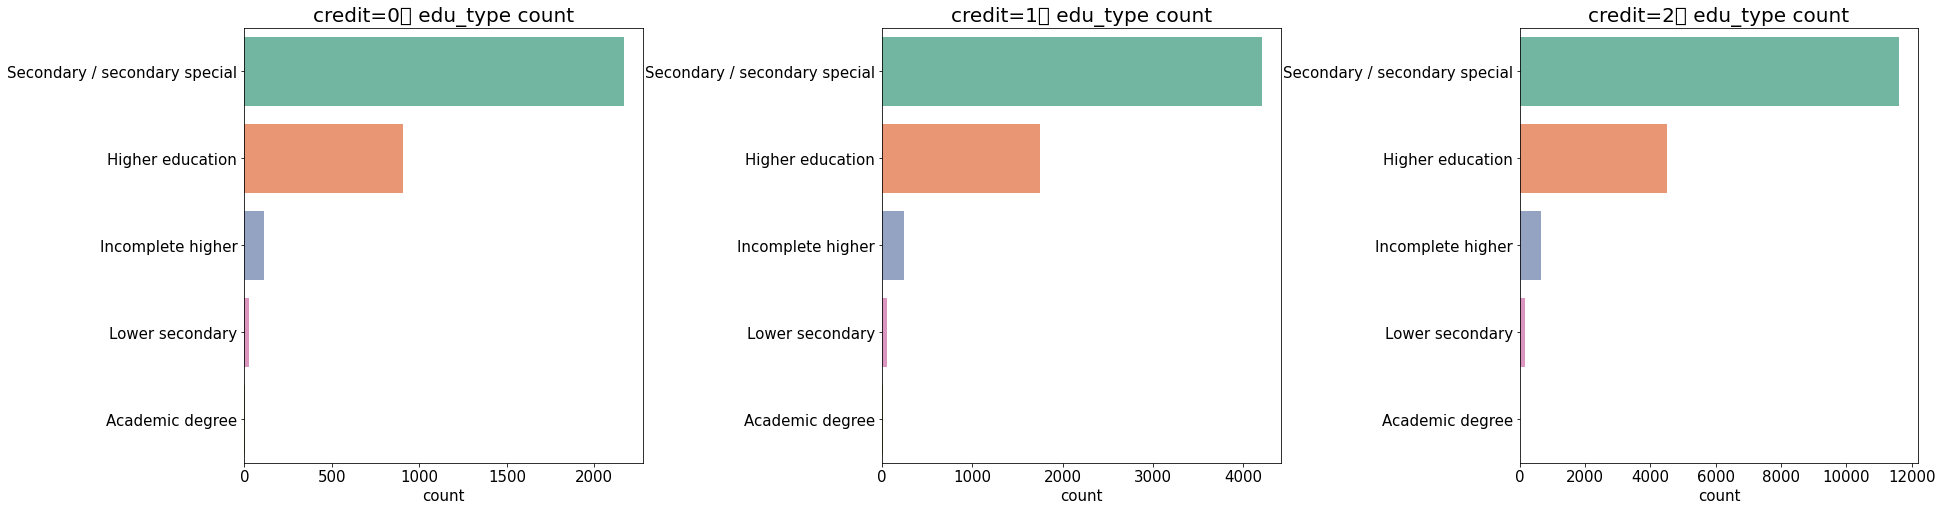

In [18]:
draw_cat_bar('edu_type')

In [19]:
print("Secondary / secondary special's ratio: {}%".format(round(train['edu_type'].value_counts()[0] / len(train) * 100,2)))

Secondary / secondary special's ratio: 68.02%


- 신용등급여부와 상관없이 분포가 동일하게 나타났으며, Secondary / secondary special의 분포가 68.02%로 가장 높게 나타났다.

#### 신용등급 별 결혼 여부 분포

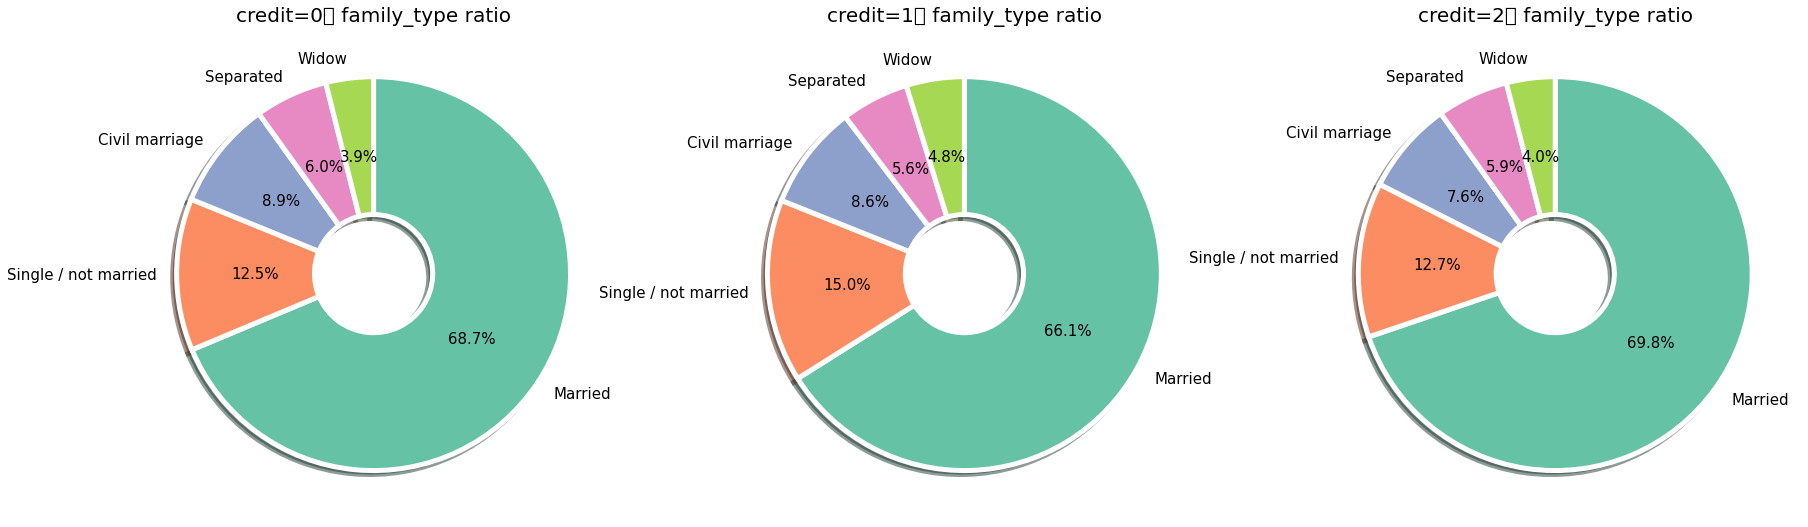

In [20]:
draw_cat_pie('family_type')

- 마찬가지로 신용등급별로 분포가 비슷하게 나타났으며, 결혼한 가정이 절반 이상을 차지한다.

#### 신용등급 별 생활 방식 분포

In [21]:
train.house_type.unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

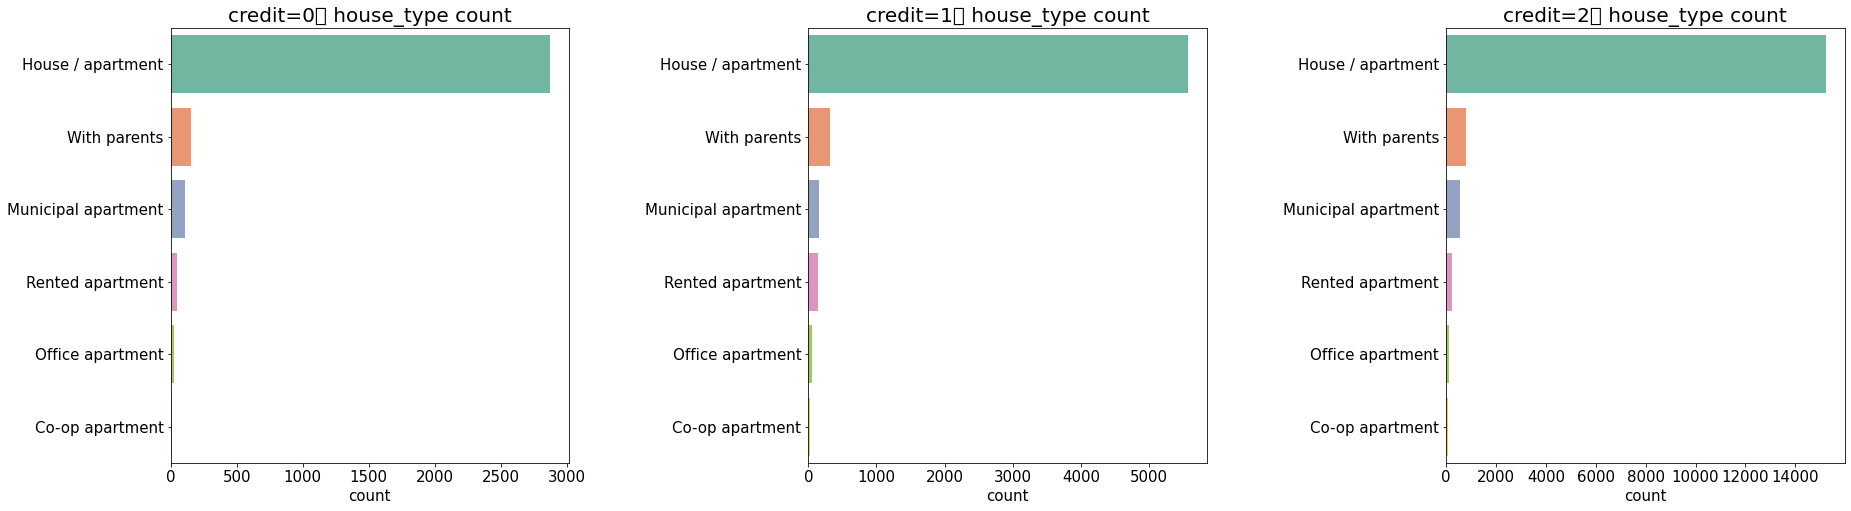

In [22]:
draw_cat_bar('house_type')

- House / apartment의 house_type이 3개의 신용등급에서 모두 89.4%로 가장 높게 나타났다.

#### 신용등급 별 휴대폰 소유 여부 분포

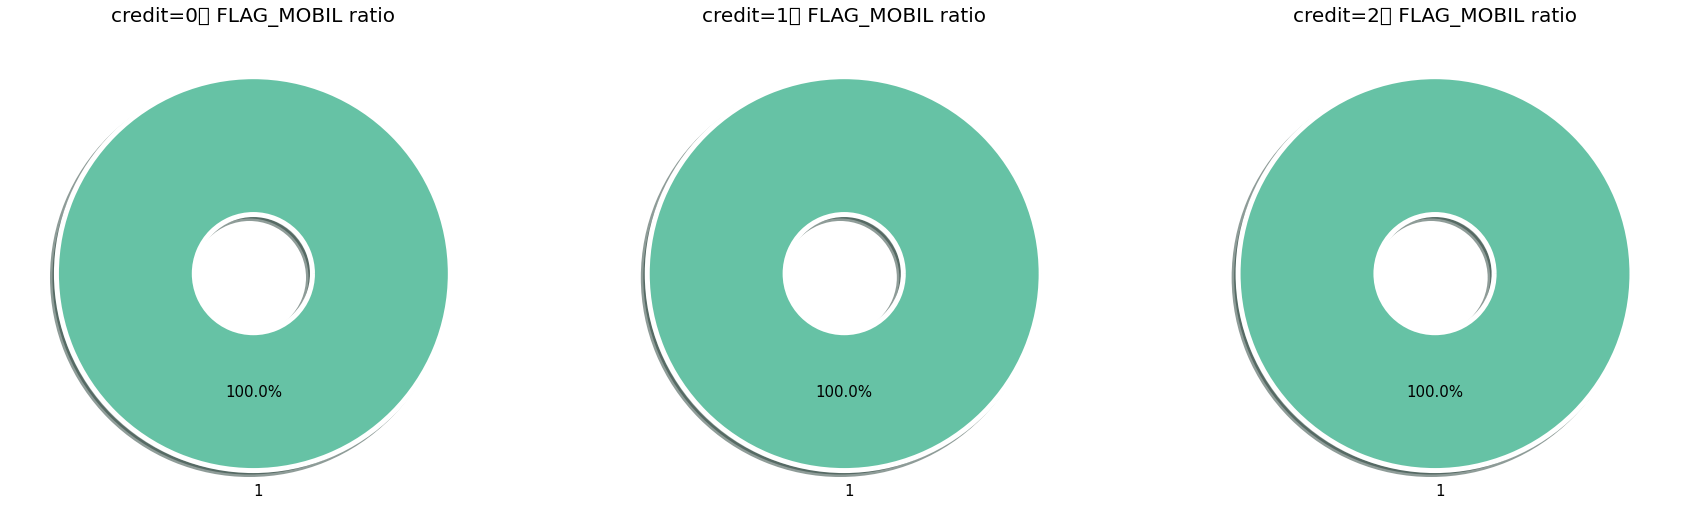

In [23]:
draw_cat_pie('FLAG_MOBIL')

- 모든 사람이 휴대폰을 소유하고 있으므로 전처리과정에서 drop시켜야겠다.

#### 신용등급 별 업무용 전화 소유 여부 분포

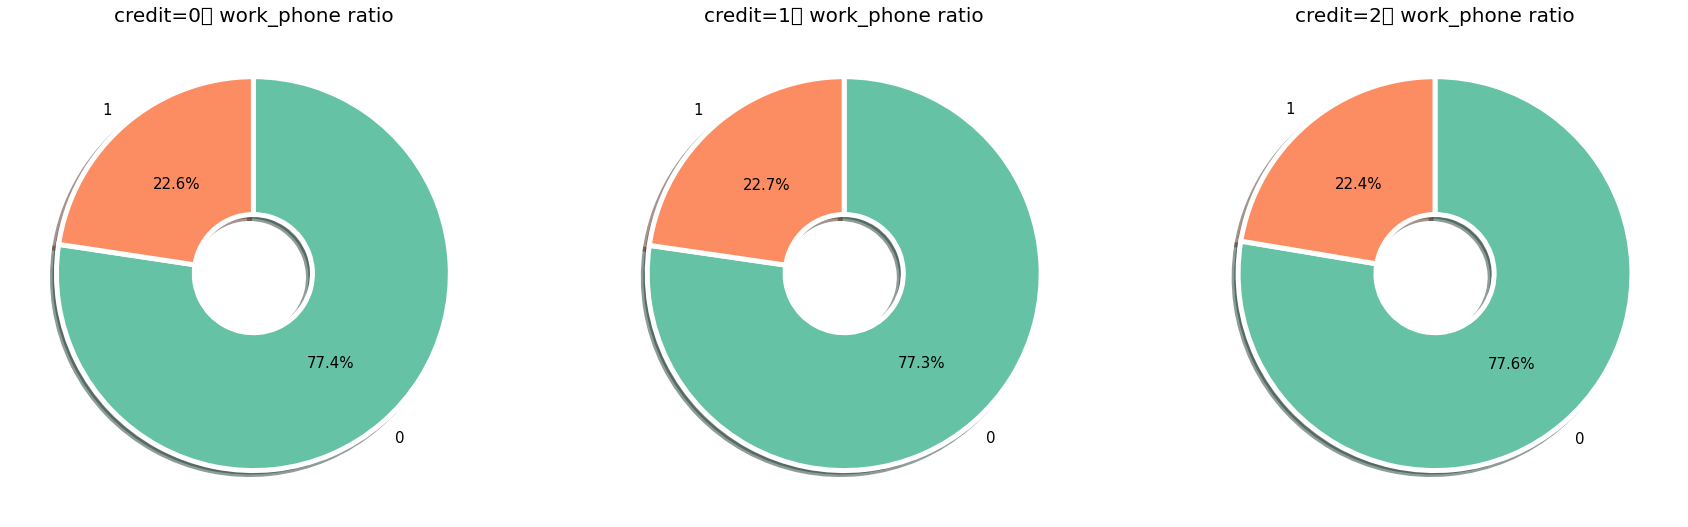

In [24]:
draw_cat_pie('work_phone')

- 모든 신용등급별로 업무용 전화를 소유하지 않은 사람이 소유한 사람보다 훨씬 더 많았다.

#### 신용등급 별 전화 소유 여부 분포

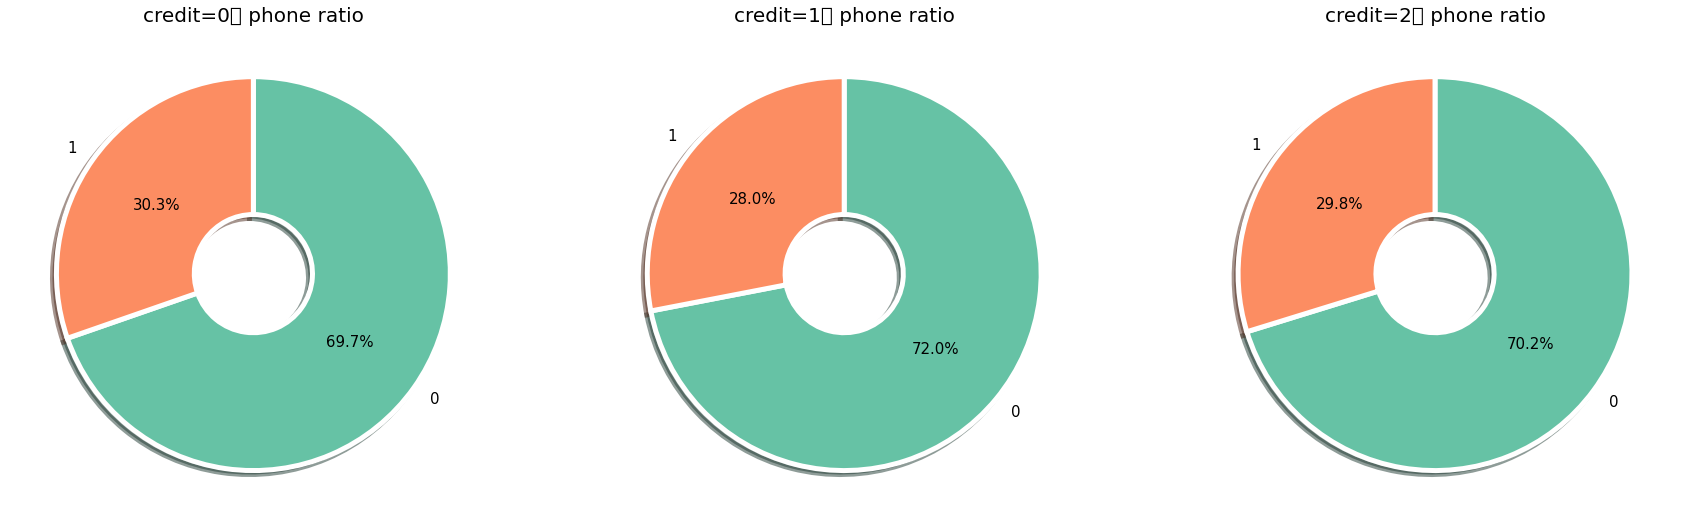

In [25]:
draw_cat_pie('phone')

- 가정용 전화를 소유하지 않은 사람이 소유한 사람보다 모든 신용등급에서 훨씬 더 많이 나타났다.

#### 신용등급 별 이메일 소유 여부 분포

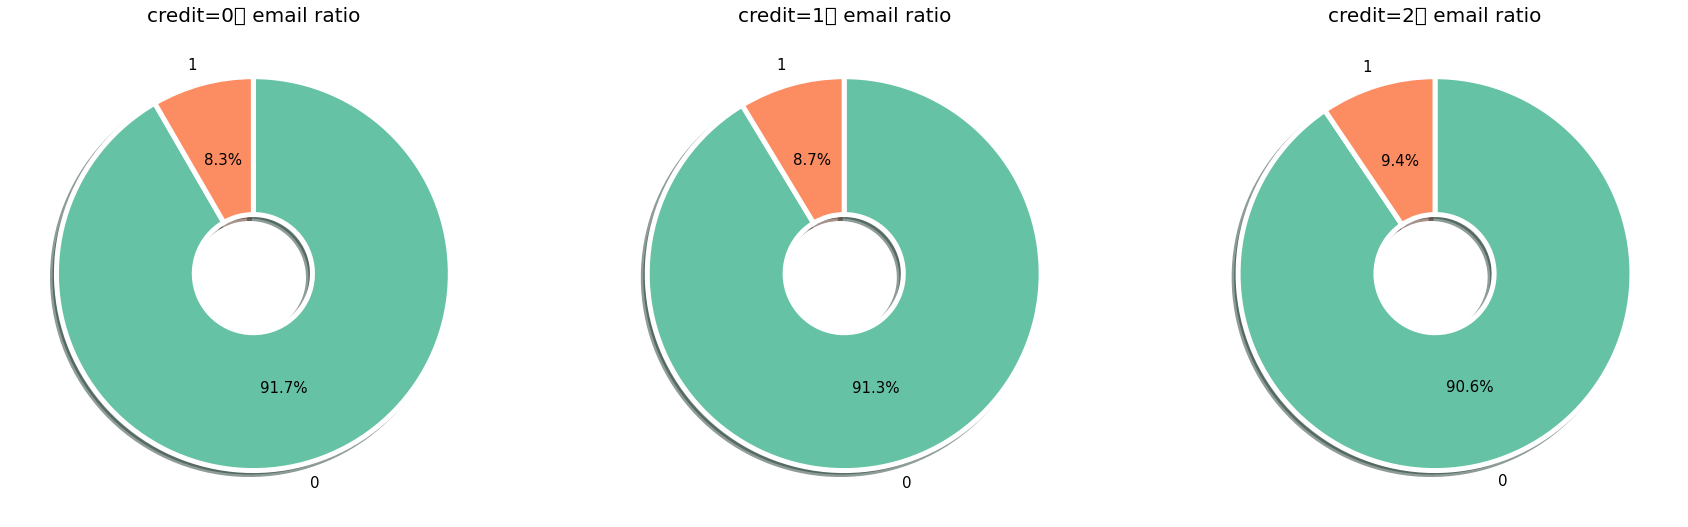

In [26]:
draw_cat_pie('email')

- 데이터의 약 90%정도의 사람이 이메일을 소유하지 않는 것으로 나타났다.

#### 신용등급 별 직업 유형 분포

In [27]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

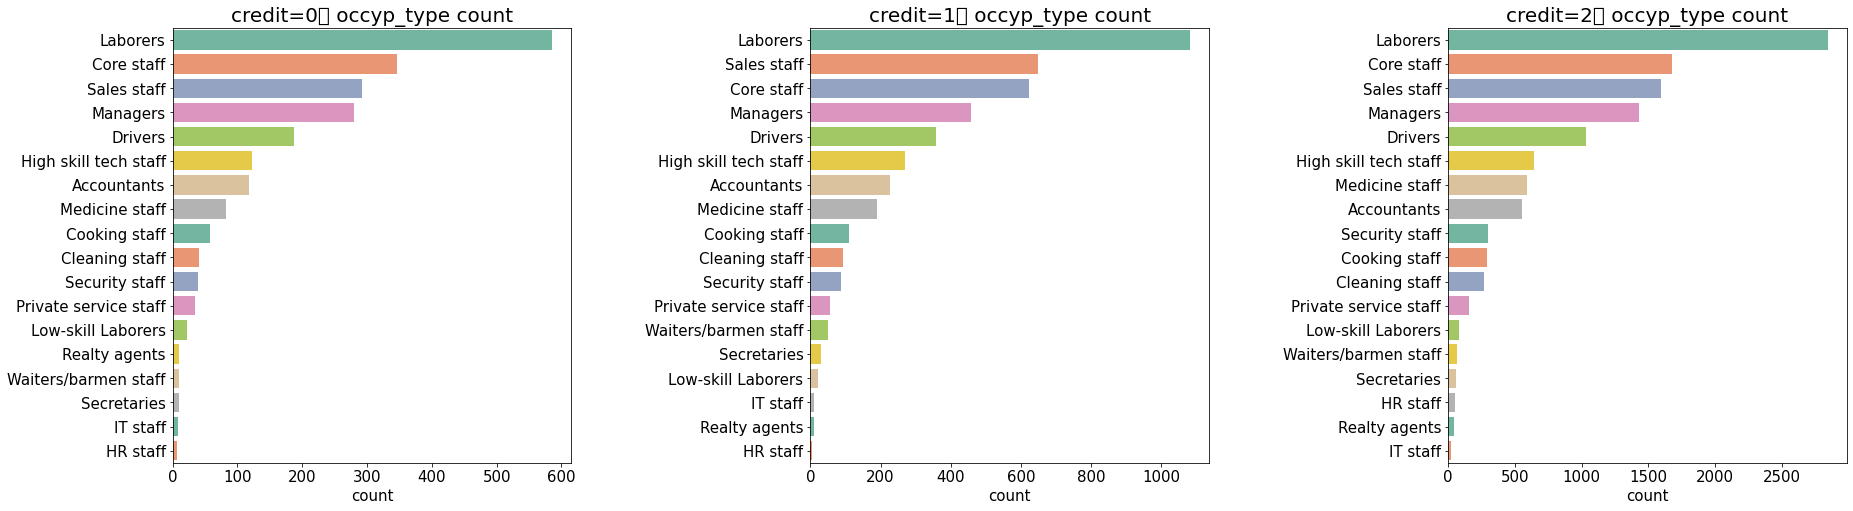

In [28]:
draw_cat_bar('occyp_type')

In [29]:
print("Labor's ratio: {}%".format(round(train['occyp_type'].value_counts()[0] / len(train) * 100,2))) # 널값의 비율

Labor's ratio: 17.05%


In [30]:
len(train) - train['occyp_type'].value_counts().sum() # 널값 존재

8171

In [31]:
print("Null's ratio: {}%".format(round(train['occyp_type'].isnull().sum() / len(train) * 100,2))) # 널값의 비율

Null's ratio: 30.88%


- 직업 종류가 가장 많은 특성은 Labor로 약 17%가 존재했다.
- 그러나 널값이 유일하게 존재하는 컬럼으로, 널값의 수치를 확인하였고,
- 직업이 없는(혹은 정보가 없는) 사람들의 비율이 약 30.9%로 가장 높게 나타났다.

---

### 신용등급을 기준으로 한 분포 - 수치형 변수

- 수치형 변수로는 income_total, days_birth, days_employed, family_size, begin_month, child_num가 있었다.

In [32]:
# 신용등급별 수치형 컬럼을 바 차트로 시각화 하기 위한 함수
def draw_num_bar(column):
    f, ax = plt.subplots(1, 3, figsize=(30, 8))

    sns.distplot(credit_0[column], ax = ax[0])
    ax[0].tick_params(labelsize=15)
    ax[0].set_title('credit=0인 {} count'.format(column), size=20)
    ax[0].set_xlabel('{}'.format(column))
    ax[0].set_ylabel('count', size=15)

    sns.distplot(credit_1[column], ax = ax[1])
    ax[1].tick_params(labelsize=15)
    ax[1].set_title('credit=1인 {} count'.format(column), size=20)
    ax[1].set_xlabel('{}'.format(column))  
    ax[1].set_ylabel('count', size=15)

    sns.distplot(credit_2[column], ax = ax[2])
    ax[2].tick_params(labelsize=15)  
    ax[2].set_title('credit=2인 {} count'.format(column), size=20)
    ax[2].set_xlabel('{}'.format(column))
    ax[2].set_ylabel('count', size=15)

    plt.subplots_adjust(wspace=0.6, hspace=0.3)
    plt.show()

#### 신용등급 별 자녀 수의 분포

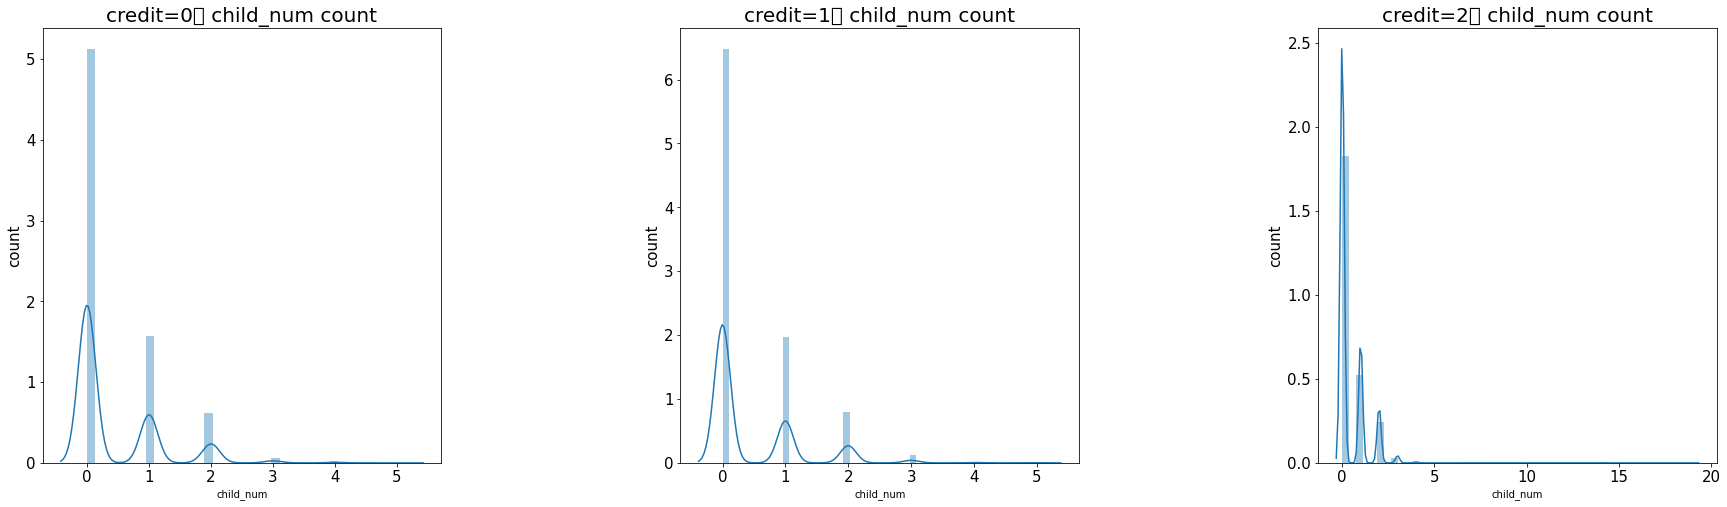

In [33]:
draw_num_bar('child_num')

- 대체적으로 자녀가 없는 사람들이 많이 분포해있다.

#### 신용등급 별 연간소득의 분포

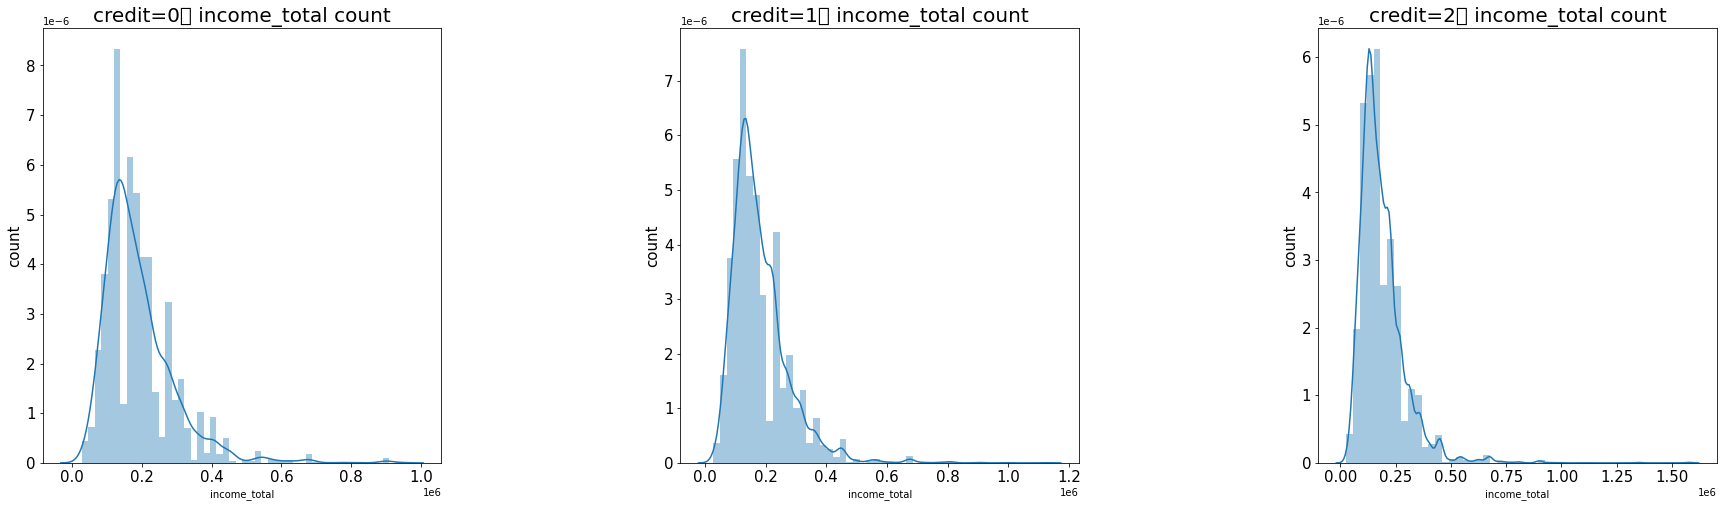

In [34]:
draw_num_bar('income_total')

- 등급 간의 연간 소득의 분포의 차이가 거의 없었다.

#### 신용등급 별 출생일 분포

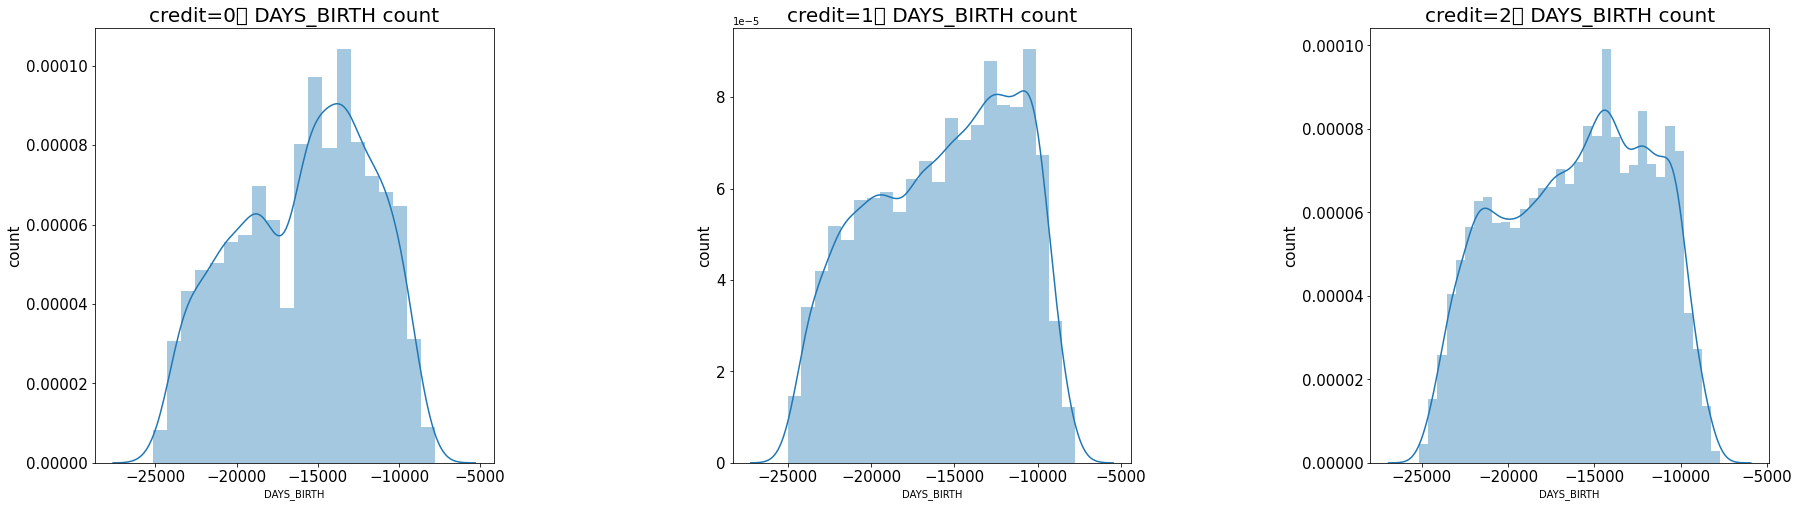

In [35]:
draw_num_bar('DAYS_BIRTH')

- 출생일 분포를 보았을 때, 등급 간의 분포의 차이는 거의 없었으며 20대 중반에서에서 40세 사이의 사람들이 많이 분포해있었다. 

#### 신용등급 별 업무시작일 분포

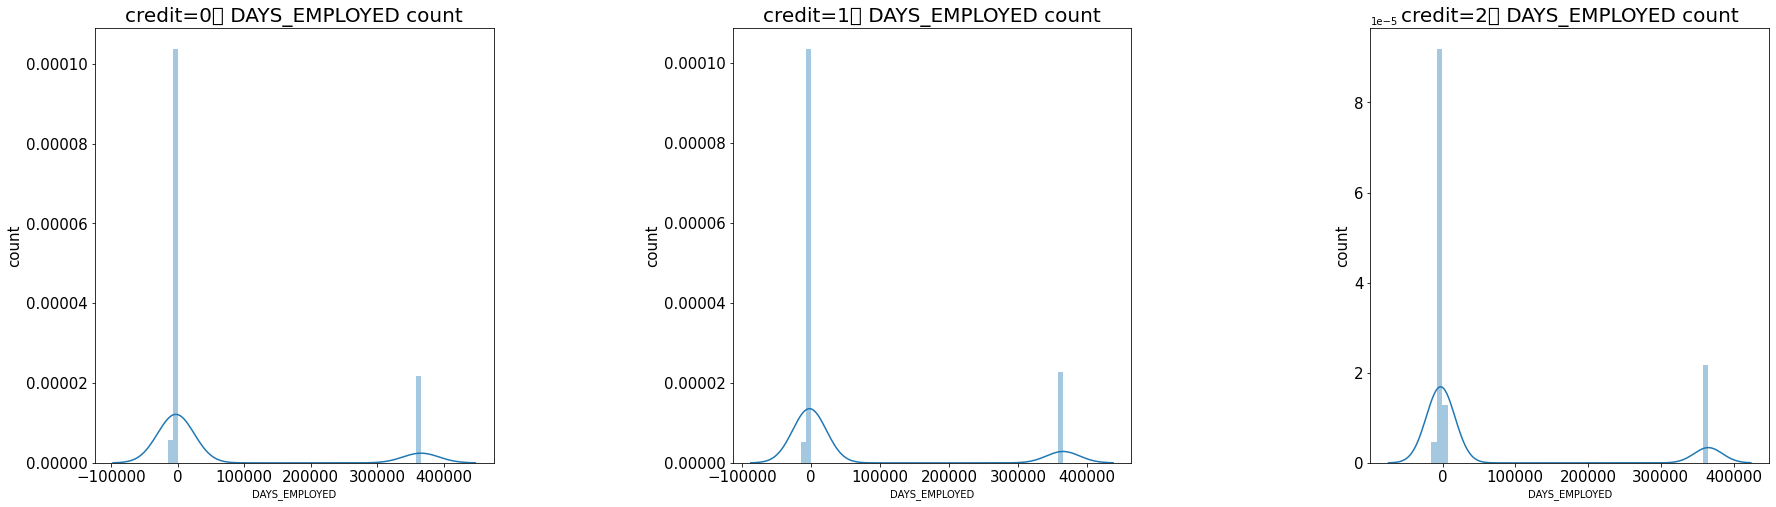

In [36]:
draw_num_bar('DAYS_EMPLOYED')

- 값이 0이라는 것은 직업이 없는 사람을 의미하며, 대체적으로 무직인 사람들이 많이 분포하였으며, 등급 간의 유의미한 분포의 차이는 없었다.

#### 신용등급 별 가족 규모 분포

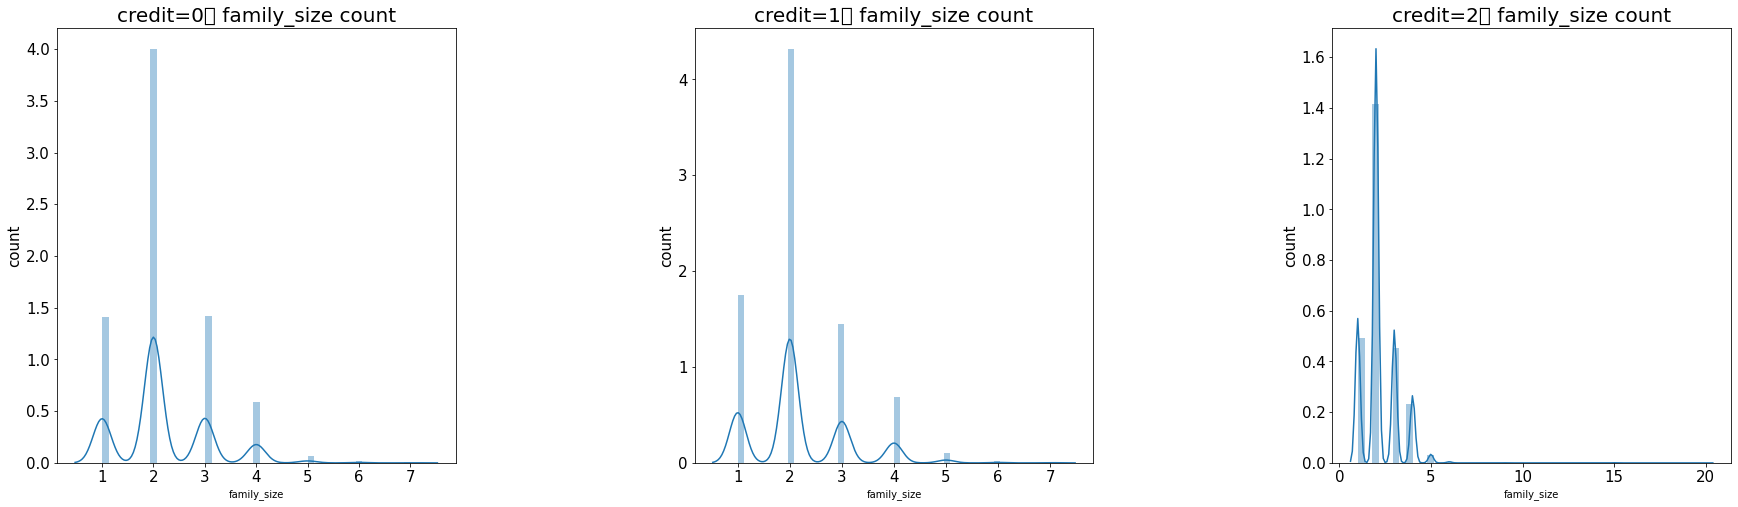

In [37]:
draw_num_bar('family_size')

- 앞서 보았던 자녀가 없는 사람들이 많이 존재했다는 것을 미루어 보았을 때, 가족 규모가 2명이 많이 분포한다는 것을 유추할 수 있으며 시각적으로도 확인할 수 있었다.
- 또한 앞에서 확인한 결혼한 사람들이 많았다는 것도 연관되었다는 사실을 알 수 있다.
- 등급 간의 유의미한 분포의 차이는 없었다.

#### 신용등급 별 신용카드 발급 월 분포

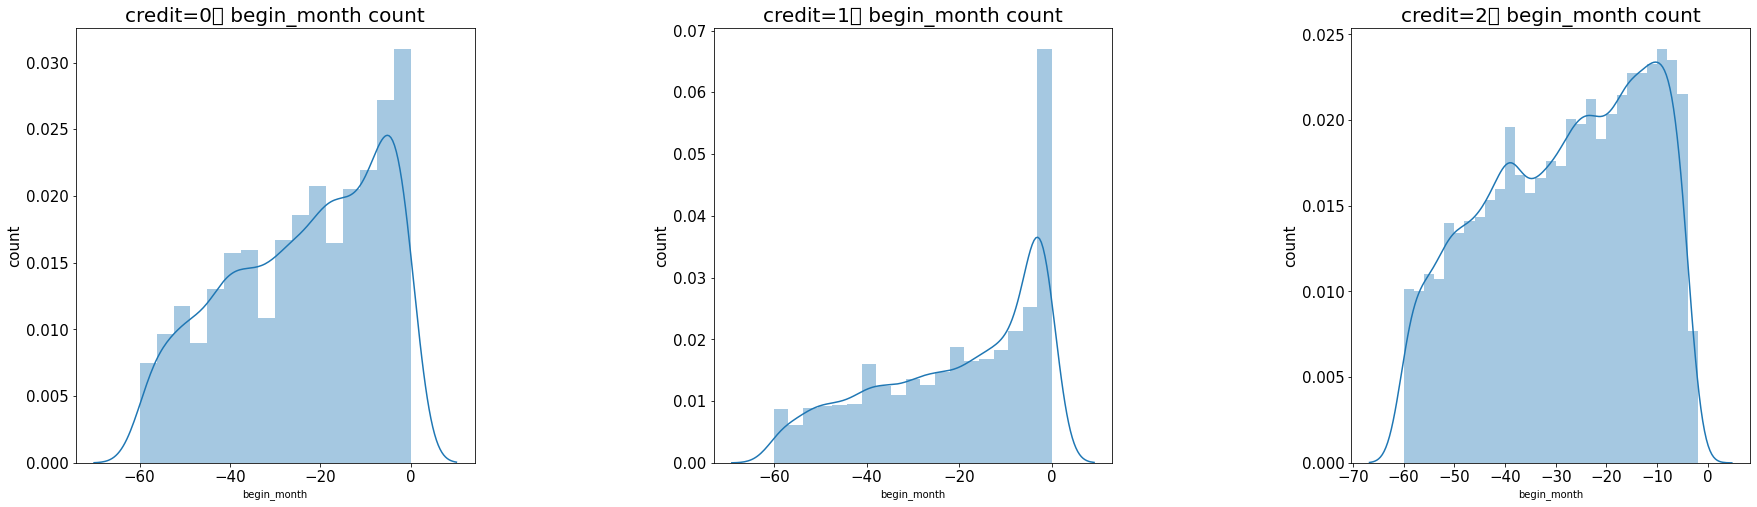

In [38]:
draw_num_bar('begin_month')

- 3개의 신용등급 모두 10개월 이하로 카드발급을 사람들이 많이 분포한다는 것을 알 수 있다.

---

## 데이터 전처리

### 데이터 관찰

In [39]:
# # 데이터 불러오기
# train = pd.read_csv('../data/credit_train.csv', index_col=0)
# test = pd.read_csv('../data/credit_test.csv', index_col=0)

In [5]:
train.tail()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


- gender: 성별, car: 차량 소유 여부, reality: 부동산 소유 여부 


- child_num: 자녀 수, income_total: 연간 소득


- income_type: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
            
            
- edu_type: 교육 수준
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


- family_type: 결혼 여부
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
    
    
- house_type: 생활 방식 
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
    
    
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미


- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
    
    
- FLAG_MOBIL: 핸드폰 소유 여부


- work_phone: 업무용 전화 소유 여부, phone: 전화 소유 여부, email: 이메일 소유 여부


- occyp_type: 직업 유형, family_size: 가족 규모


- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 


- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    -  낮을 수록 높은 신용의 신용카드 사용자를 의미함     

In [41]:
test.tail()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0
36456,F,N,Y,0,270000.0,Working,Higher education,Married,House / apartment,-9154,-187,1,0,0,1,Laborers,2.0,-11.0


In [42]:
train.shape

(26457, 19)

In [43]:
test.shape

(10000, 18)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

### 결측치 확인

In [6]:
train.isnull().sum()
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [8]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [47]:
train[train['occyp_type'].isnull()]['credit'].value_counts() # 등급별 직업유형의 값이 널값인 데이터의 분포

2.0    5266
1.0    1938
0.0     967
Name: credit, dtype: int64

- train 데이터의 credit 비율과 occyp_type 가 NaN인 비율이 비슷하여 drop을 시키려 하였으나 컬럼의 이름이 직업종류인 것을 볼 수 있다.
- 추후 파생변수를 생성하는데 있어 필요할지도 몰라 일단 놔두었다.

In [48]:
print("occyp_type's null values ratio: {}%".format(round(train['occyp_type'].isnull().sum() / len(train) * 100, 1)))

occyp_type's null values ratio: 30.9%


- 또한 그 비율이 30.9%로 적지 않기 때문에 어떻게 처리할지에 대해 생각해보자

In [9]:
train = train.fillna({'occyp_type': 'No job or No info'})
test = test.fillna({'occyp_type': 'No job or No info'})

- 컬럼의 이름이 직업유형인 것으로 보아 직업이 없거나 정보가 없는 것으로 유추해야 될 것 같다.

### 변수 간 상관관계 확인

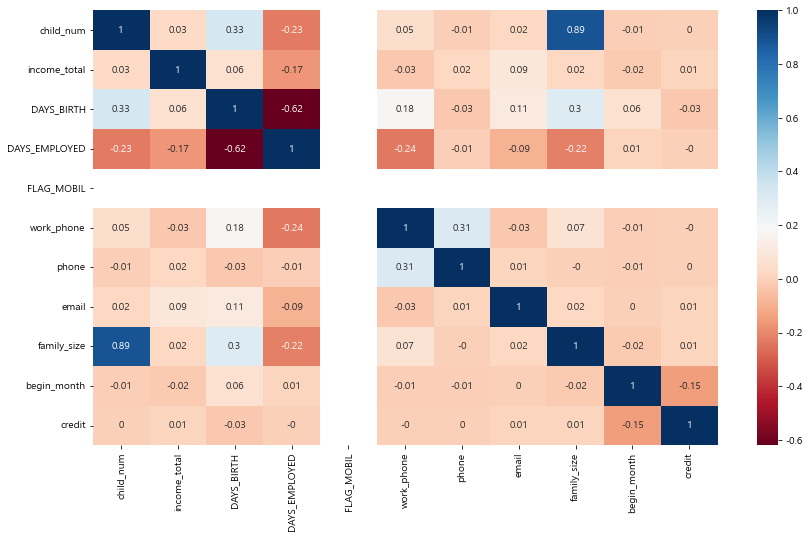

In [11]:
plt.figure(figsize =(14,8))
corr = train.corr().round(2)
sns.heatmap(corr, annot=True, cmap='RdBu');

- flag_mobil의 값이 없어 확인해봐야겠다.
- child_num과 family_size사이에는 상관도가 0.89로 매우 높아 다중공선성이 발생할 수 있을 것 같다.
- 이 두개의 컬럼을 각각 활용하는 것보다 위에서 언급했던 것처럼 파생변수를 만드는데 활용해야 될 것 같다.

In [12]:
train['FLAG_MOBIL'].value_counts()
test['FLAG_MOBIL'].value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

- 데이터에 있는 모든 사람들이 핸드폰을 소유하고 있으므로, 필요없는 컬럼으로 간주해야겠다.

#### 필요없는 컬럼 제거

In [30]:
train.drop('FLAG_MOBIL', axis=1, inplace=True)
test.drop('FLAG_MOBIL', axis=1, inplace=True)

### 수치형 데이터 전처리

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [31]:
numeric_vars = train.dtypes[train.dtypes != 'object'].index.tolist()
train[numeric_vars].info()

numeric_vars = test.dtypes[test.dtypes != 'object'].index.tolist()
test[numeric_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   child_num      26457 non-null  int64  
 1   income_total   26457 non-null  float64
 2   DAYS_BIRTH     26457 non-null  int64  
 3   DAYS_EMPLOYED  26457 non-null  int64  
 4   work_phone     26457 non-null  int64  
 5   phone          26457 non-null  int64  
 6   email          26457 non-null  int64  
 7   family_size    26457 non-null  float64
 8   begin_month    26457 non-null  float64
 9   credit         26457 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   child_num      10000 non-null  int64  
 1   income_total   10000 non-null  float64
 2   DAYS_BIRTH     10000

In [55]:
train[numeric_vars].describe() 

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


#### 컬럼별 데이터 분포 확인

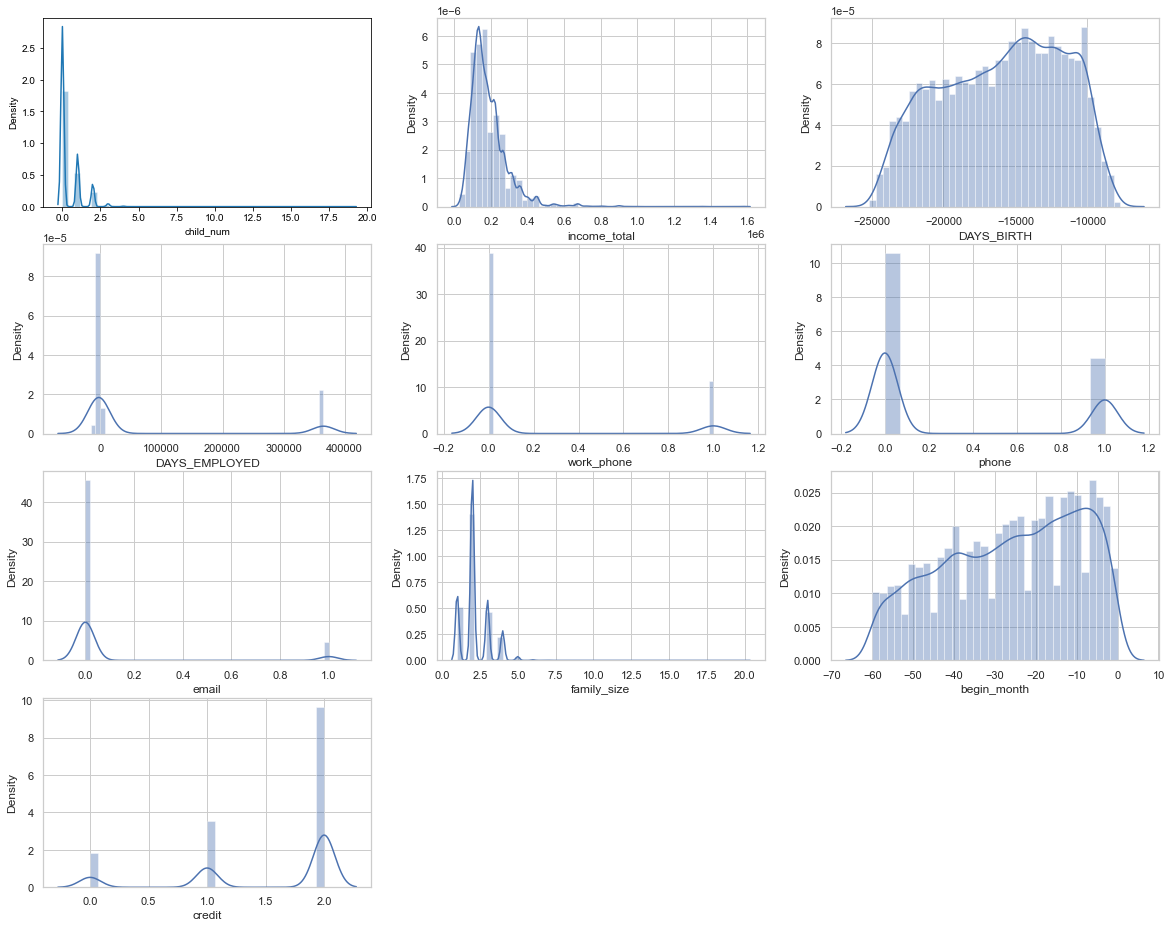

In [56]:
plt.figure(figsize = (20,16))
for i, column in enumerate(numeric_vars):
    plt.subplot(4,3,i+1)
    sns.set_theme(style='whitegrid')
    sns.distplot(train[column])
plt.show()

- work_phone, phone, email 같은 경우는 소유하고 있거나 소유하고 있지 않은 것으로 이미 라벨인코딩이 되어있는 상태로 보면 될 것 같다.
- 몇몇의 수치형 컬럼들은 데이터들이 한쪽으로 치우친 skew되어 있는 것이 보인다.
- 또한 음수인 값들이 존재하는 컬럼들이 있는데 **파생변수**를 만들거나 **스케일링**을 하는 데 있어 양수화로 전환할 필요가 있어 보인다.
- 정규화와 양수 변환 이전에 이상치를 먼저 확인하여 처리할게 있으면 처리해보자.

#### 컬럼별 이상치 확인

In [57]:
numeric_vars = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']

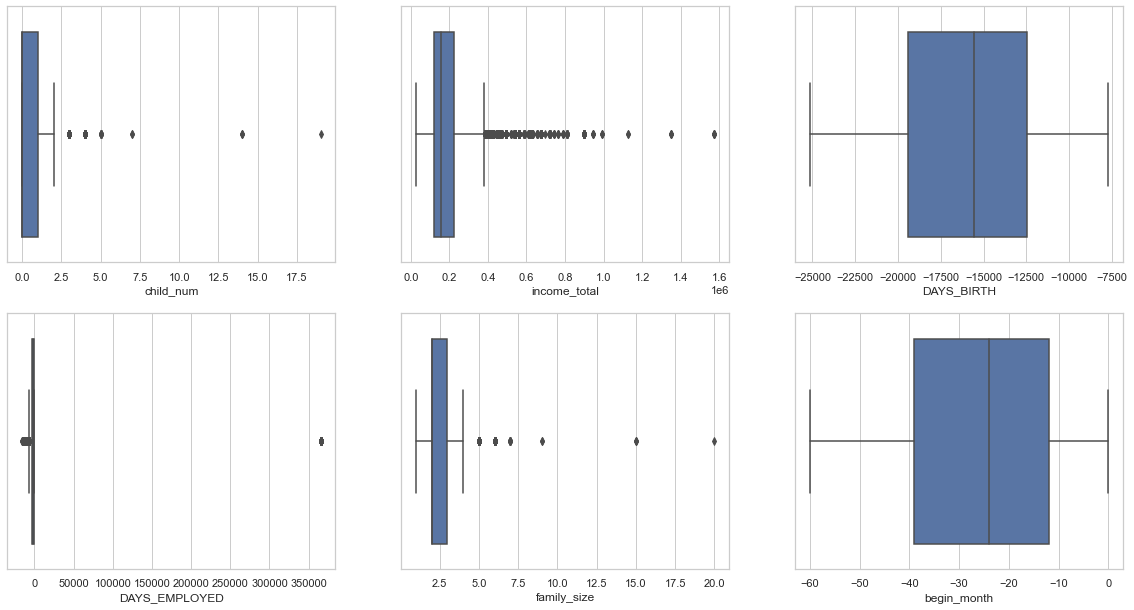

In [58]:
plt.figure(figsize = (20,16))

for i, column in enumerate(numeric_vars):
    plt.subplot(3,3,i+1)
    sns.set_theme(style='whitegrid')
    sns.boxplot(train[column])
plt.show()

In [59]:
def get_outlier(df=None, column=None, weight=1.5):
    df = train[column]
    quantile_25 = np.percentile(df.values, 25)
    quantile_75 = np.percentile(df.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = df[(df < lowest_val) | (df > highest_val)].index
    print('{}의 outlier의 수 : '.format(column) , len(outlier_index))
    
    return outlier_index

In [60]:
outlier_col = ['child_num', 'income_total', 'DAYS_EMPLOYED', 'family_size']
for item in outlier_col:
    get_outlier(df=train, column=item, weight=1.5)

child_num의 outlier의 수 :  369
income_total의 outlier의 수 :  1129
DAYS_EMPLOYED의 outlier의 수 :  5726
family_size의 outlier의 수 :  350


- 이렇게 컬럼별 outlier의 개수가 나왔다.
- 성능을 확인해가면서 이상치를 어떻게 처리할 것인지 계속해서 고려해야 될 것 같다.

In [61]:
# 이상치 제거 고려 셀

#### 'DAYS_EMPLOYED' 컬럼
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미하므로 0으로 처리한다

In [32]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

#### 음수값이 존재하는 컬럼 양수로 변환 - 'DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED'

In [33]:
neg_vars = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for var in neg_vars:
    train[var]=np.abs(train[var])
    test[var]=np.abs(test[var])

In [64]:
train.head(1)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,No job or No info,2.0,6.0,1.0


####  'age' 변수 생성

- DAYS_BIRTH: 출생일
- 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- 값을 사용하기 어려운 범위이므로 나이 컬럼을 만들어 볼 수 있을 것 같다.

In [65]:
train['DAYS_BIRTH'].describe()

count    26457.000000
mean     15958.053899
std       4201.589022
min       7705.000000
25%      12446.000000
50%      15547.000000
75%      19431.000000
max      25152.000000
Name: DAYS_BIRTH, dtype: float64

In [34]:
train['age'] = train['DAYS_BIRTH'] // 365
test['age'] = test['DAYS_BIRTH'] // 365

#### 일부 수치형 변수 구간화 - 'age', 'child_num', 'family_size'

In [67]:
train.age.describe()

count    26457.000000
mean        43.213478
std         11.513590
min         21.000000
25%         34.000000
50%         42.000000
75%         53.000000
max         68.000000
Name: age, dtype: float64

- 나이를 구간화 시켜 10대, 20대, 30대 등으로 나누면 인사이트를 활용하는데 있어서도 편할 수 있어 구간화 시키기로 하였다.  

In [35]:
train.loc[(train['age'] < 30) & (train['age'] >= 20),'age']= 2
train.loc[(train['age'] < 40) & (train['age'] >= 30),'age']= 3
train.loc[(train['age'] < 50) & (train['age'] >= 40),'age']= 4
train.loc[(train['age'] < 60) & (train['age'] >= 50),'age']= 5
train.loc[(train['age'] < 70) & (train['age'] >= 60),'age']= 6

test['age'] = test['age'] // 10

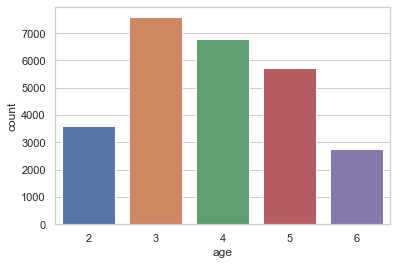

In [69]:
sns.countplot(x=train['age']);

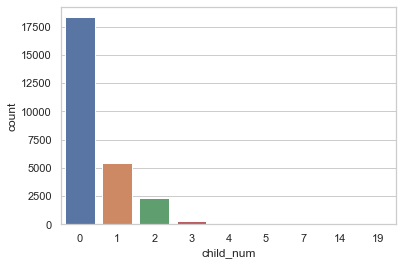

In [70]:
sns.countplot(x=train['child_num']);

- 3명이상부터는 값이 전체 비율에 비해 아주 작기 때문에 3명이상인 자식 수는 묶기로 하였다.

In [36]:
train.loc[train['child_num'] >= 3,'child_num']= 3
test.loc[test['child_num'] >= 3,'child_num']= 3

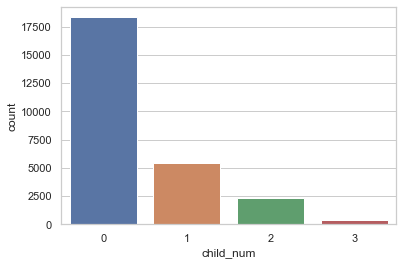

In [72]:
sns.countplot(x=train['child_num']);

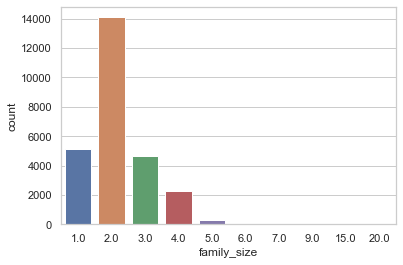

In [73]:
sns.countplot(x=train['family_size']);

- 마찬가지로 5명 이상부터는 값이 전체 비율에 비해 아주 작기 때문에 5명이상인 가족 수도 묶기로 하였다.

In [37]:
train.loc[train['family_size'] >= 5,'family_size']= 5
test.loc[test['family_size'] >= 5,'family_size']= 5

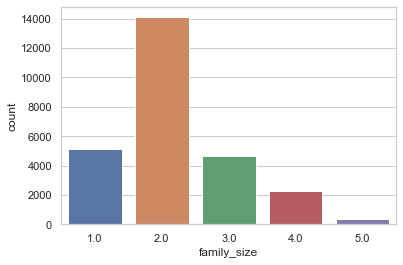

In [75]:
sns.countplot(x=train['family_size']);

#### 나머지 기본적인 파생변수 생성 - 'days_employed_year', 'days_employed_month', 'days_employed_week', 'begin_year'

- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
    

- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 

In [38]:
# age생성과 마찬가지로
train['begin_year'] = train['begin_month'] // 12 + 1 # 카드 발급 연 단위를 월 단위가 12개월 안일 때를 1년 기준으로 잡음 

train['DAYS_EMPLOYED_YEAR'] = train['DAYS_EMPLOYED'] // 365 + 1 # 고용 일수도 마찬가지로 반올림해줌
train['DAYS_EMPLOYED_MONTH'] = train['DAYS_EMPLOYED'] // 30 + 1
train['DAYS_EMPLOYED_WEEK'] = train['DAYS_EMPLOYED'] // 7 + 1

#########################################################################
test['begin_year'] = test['begin_month'] // 12 + 1 # 카드 발급 연 단위를 월 단위가 12개월 안일 때를 1년 기준으로 잡음 

test['DAYS_EMPLOYED_YEAR'] = test['DAYS_EMPLOYED'] // 365 + 1 # 고용 일수도 마찬가지로 반올림해줌
test['DAYS_EMPLOYED_MONTH'] = test['DAYS_EMPLOYED'] // 30 + 1
test['DAYS_EMPLOYED_WEEK'] = test['DAYS_EMPLOYED'] // 7 + 1

In [39]:
numeric_vars = train.dtypes[train.dtypes != 'object'].index
numeric_vars = test.dtypes[test.dtypes != 'object'].index

In [40]:
test[numeric_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   child_num            10000 non-null  int64  
 1   income_total         10000 non-null  float64
 2   DAYS_BIRTH           10000 non-null  int64  
 3   DAYS_EMPLOYED        10000 non-null  int64  
 4   work_phone           10000 non-null  int64  
 5   phone                10000 non-null  int64  
 6   email                10000 non-null  int64  
 7   family_size          10000 non-null  float64
 8   begin_month          10000 non-null  float64
 9   age                  10000 non-null  int64  
 10  begin_year           10000 non-null  float64
 11  DAYS_EMPLOYED_YEAR   10000 non-null  int64  
 12  DAYS_EMPLOYED_MONTH  10000 non-null  int64  
 13  DAYS_EMPLOYED_WEEK   10000 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [41]:
# float형 -> int형
for col in numeric_vars:
    if test[col].dtypes == 'float64':
        test[col] = test[col].astype('int64')

In [42]:
test[numeric_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   child_num            10000 non-null  int64
 1   income_total         10000 non-null  int64
 2   DAYS_BIRTH           10000 non-null  int64
 3   DAYS_EMPLOYED        10000 non-null  int64
 4   work_phone           10000 non-null  int64
 5   phone                10000 non-null  int64
 6   email                10000 non-null  int64
 7   family_size          10000 non-null  int64
 8   begin_month          10000 non-null  int64
 9   age                  10000 non-null  int64
 10  begin_year           10000 non-null  int64
 11  DAYS_EMPLOYED_YEAR   10000 non-null  int64
 12  DAYS_EMPLOYED_MONTH  10000 non-null  int64
 13  DAYS_EMPLOYED_WEEK   10000 non-null  int64
dtypes: int64(14)
memory usage: 1.1 MB


In [45]:
# 컬럼명 재정렬
columnList = ['gender', 'age', 'DAYS_BIRTH', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED', 'DAYS_EMPLOYED_WEEK', 'DAYS_EMPLOYED_MONTH', 'DAYS_EMPLOYED_YEAR', 
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size', 'begin_month', 'begin_year','credit']

In [46]:
train = train[columnList]
train.head(1)

test = test[columnList]
test.head(1)

,gender,age,DAYS_BIRTH,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED_WEEK,DAYS_EMPLOYED_MONTH,DAYS_EMPLOYED_YEAR,work_phone,phone,email,occyp_type,family_size,begin_month,begin_year
index,,,,,,,,,,,,,,,,,,,,,
26457,M,6,21990,Y,N,0,112500,Pensioner,Secondary / secondary special,Civil marriage,...,1,1,1,0,1,0,NaN,2,60,6


### 유의미할 것 같은 파생변수 생성 - 수치형 데이터

- 유의미하다고 생각되는 파생변수 리스트 -> 나중에 인사이트와도 연관성을 고려하여 선정함

#### 'income total'은 현재 연차의 연간 소득을 의미, 내가 일한 기간에 대해 나누었을 때 평균 기간에 대한 소득을 구할 수 있음

In [47]:
train['INCOME_EMPLOYED_RATIO_DAY'] = train['income_total'] / train['DAYS_EMPLOYED'] # 일 기준
train['INCOME_EMPLOYED_RATIO_WEEK'] = train['income_total'] / train['DAYS_EMPLOYED_WEEK'] # 주 기준
train['INCOME_EMPLOYED_RATIO_MONTH'] = train['income_total'] / train['DAYS_EMPLOYED_MONTH'] # 월 기준
train['INCOME_EMPLOYED_RATIO_YEAR'] = train['income_total'] / train['DAYS_EMPLOYED_YEAR'] # 연 기준

test['INCOME_EMPLOYED_RATIO_DAY'] = test['income_total'] / test['DAYS_EMPLOYED'] # 일 기준
test['INCOME_EMPLOYED_RATIO_WEEK'] = test['income_total'] / test['DAYS_EMPLOYED_WEEK'] # 주 기준
test['INCOME_EMPLOYED_RATIO_MONTH'] = test['income_total'] / test['DAYS_EMPLOYED_MONTH'] # 월 기준
test['INCOME_EMPLOYED_RATIO_YEAR'] = test['income_total'] / test['DAYS_EMPLOYED_YEAR'] # 연 기준

#### 가족수 - 자식수 -> 실질적으로 경제적 활동을 하는 사람 수

In [48]:
train['economical_people'] = train['family_size'] - train['child_num']  
test['economical_people'] = test['family_size'] - test['child_num']  

#### income을 가족 수 및 자식 수로 나눈 비율

- 가족 1명당 연간 소득이 소비되는 수치 확인 -> 부양 능력?이라고 해석해도 될듯하다.
- 자식 1명당 연간 소득이 소비되는 수치 확인 -> 교육비 지출 능력?

In [49]:
train['INCOME_fam_RATIO'] = train['income_total'] / train['family_size']
train['INCOME_child_num_RATIO'] = train['income_total'] / train['child_num']

test['INCOME_fam_RATIO'] = test['income_total'] / test['family_size']
test['INCOME_child_num_RATIO'] = test['income_total'] / test['child_num']

#### 일을하게 된 시점 변수 추가

In [50]:
train['GET_JOB_AGE'] = (train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']) // 365 # 취업한 나이

test['GET_JOB_AGE'] = (test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']) // 365 # 취업한 나이

In [51]:
# age와 마찬가지로 구간화
train.loc[(train['GET_JOB_AGE'] < 20) & (train['GET_JOB_AGE'] >= 10),'GET_JOB_AGE']= 1
train.loc[(train['GET_JOB_AGE'] < 30) & (train['GET_JOB_AGE'] >= 20),'GET_JOB_AGE']= 2
train.loc[(train['GET_JOB_AGE'] < 40) & (train['GET_JOB_AGE'] >= 30),'GET_JOB_AGE']= 3
train.loc[(train['GET_JOB_AGE'] < 50) & (train['GET_JOB_AGE'] >= 40),'GET_JOB_AGE']= 4
train.loc[(train['GET_JOB_AGE'] < 60) & (train['GET_JOB_AGE'] >= 50),'GET_JOB_AGE']= 5
train.loc[(train['GET_JOB_AGE'] < 70) & (train['GET_JOB_AGE'] >= 60),'GET_JOB_AGE']= 6

test['GET_JOB_AGE'] = test['GET_JOB_AGE'] // 10

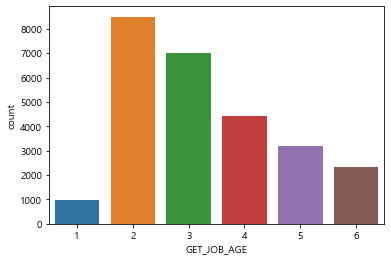

In [54]:
sns.countplot(x=train['GET_JOB_AGE']);

#### 연간수입을 살아온 날에 대한 비율 -> 개인의 밥벌이 능력이라고 해석?

In [55]:
train['income_per_days_birth'] = train['income_total'] / train['DAYS_BIRTH']  # 일 단위
train['income_per_days_birth'] = train['income_total'] / train['age']  # 연 단위

test['income_per_days_birth'] = test['income_total'] / test['DAYS_BIRTH']  # 일 단위
test['income_per_days_birth'] = test['income_total'] / test['age']  # 연 단위

In [90]:
train.columns

Index(['gender', 'age', 'DAYS_BIRTH', 'car', 'reality', 'child_num',
       'income_total', 'income_type', 'edu_type', 'family_type', 'house_type',
       'DAYS_EMPLOYED', 'DAYS_EMPLOYED_WEEK', 'DAYS_EMPLOYED_MONTH',
       'DAYS_EMPLOYED_YEAR', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'begin_year', 'credit',
       'INCOME_EMPLOYED_RATIO_DAY', 'INCOME_EMPLOYED_RATIO_WEEK',
       'INCOME_EMPLOYED_RATIO_MONTH', 'INCOME_EMPLOYED_RATIO_YEAR',
       'economical_people', 'INCOME_fam_RATIO', 'INCOME_child_num_RATIO',
       'GET_JOB_AGE', 'income_per_days_birth'],
      dtype='object')

#### 기타: 값 제대로 들어갔는지 확인 및 이상치 제거

In [57]:
new_col = ['INCOME_EMPLOYED_RATIO_DAY', 'INCOME_EMPLOYED_RATIO_WEEK',
       'INCOME_EMPLOYED_RATIO_MONTH', 'INCOME_EMPLOYED_RATIO_YEAR',
       'INCOME_fam_RATIO', 'INCOME_child_num_RATIO', 'economical_people',
       'GET_JOB_AGE', 'income_per_days_birth']
train[new_col].head()

,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,INCOME_fam_RATIO,INCOME_child_num_RATIO,economical_people,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,
0,43.002761,300.891530,1289.808917,15576.923077,101250.0,inf,2.0,2,67500.0
1,160.714286,1119.909502,4759.615385,49500.000000,82500.0,247500.0,2.0,2,82500.0
2,101.488498,709.779180,3040.540541,34615.384615,225000.0,inf,2.0,4,90000.0
3,96.797323,677.257525,2892.857143,33750.000000,101250.0,inf,2.0,3,50625.0
4,74.821853,523.255814,2218.309859,26250.000000,78750.0,inf,2.0,3,39375.0


- INCOME_child_num_RATIO에서 inf 값들이 보인다
- 아마 자식이 없는 사람들이 대다수 분포했으므로 분모가 0으로 나누어져서 이런 결과가 나온 것 같다.

In [92]:
train['INCOME_child_num_RATIO'].value_counts()

inf         18340
135000.0      855
112500.0      737
157500.0      562
225000.0      548
            ...  
124200.0        1
283500.0        1
134995.0        1
118350.0        1
23625.0         1
Name: INCOME_child_num_RATIO, Length: 168, dtype: int64

In [58]:
train.loc[train['INCOME_child_num_RATIO'] == np.inf, 'INCOME_child_num_RATIO'] = 0
train.loc[train['INCOME_EMPLOYED_RATIO_DAY'] == np.inf, 'INCOME_EMPLOYED_RATIO_DAY'] = 0


test.loc[test['INCOME_child_num_RATIO'] == np.inf, 'INCOME_child_num_RATIO'] = 0
test.loc[test['INCOME_EMPLOYED_RATIO_DAY'] == np.inf, 'INCOME_EMPLOYED_RATIO_DAY'] = 0

- 자식이 없으면 교육비 지출을 하지 않을 것으로 판단되어 0으로 대체

In [60]:
train['economical_people'].value_counts()

test['economical_people'].value_counts()

 2    7685
 1    2313
-1       1
 0       1
Name: economical_people, dtype: int64

- 분명 'economical_people'은 (가족 전체 구성원의 수 - 자식의 수)의 값인데 0은 부모가 없거나 or 잘못된 값, -1은 아예 잘못된 값인 것 같다. 확인해보자.

In [95]:
train.loc[train['economical_people'] <= 0,] # 잘못된 값 삭제

,gender,age,DAYS_BIRTH,car,reality,child_num,income_total,income_type,edu_type,family_type,...,credit,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,economical_people,INCOME_fam_RATIO,INCOME_child_num_RATIO,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,,,,,,,,,,,,,
5825,M,4,18173,Y,Y,1,450000,Commercial associate,Secondary / secondary special,Single / not married,...,2,663.716814,4639.175258,19565.217391,225000.000000,0,450000.0,450000.0,4,112500.0
14900,M,4,14776,Y,N,2,225000,Working,Secondary / secondary special,Married,...,2,101.717902,709.779180,3040.540541,32142.857143,-1,225000.0,112500.0,3,56250.0
16110,F,3,12723,N,Y,1,108000,Working,Secondary / secondary special,Single / not married,...,2,95.406360,666.666667,2842.105263,27000.000000,0,108000.0,108000.0,3,36000.0
16791,F,3,12140,N,Y,1,126000,Working,Secondary / secondary special,Married,...,2,161.745828,1125.000000,4846.153846,42000.000000,0,126000.0,126000.0,3,42000.0
18879,M,3,12755,N,Y,1,126000,Commercial associate,Secondary / secondary special,Civil marriage,...,2,59.857482,418.604651,1774.647887,21000.000000,0,126000.0,126000.0,2,42000.0
21096,M,4,16424,N,N,1,157500,Working,Secondary / secondary special,Married,...,2,108.024691,753.588517,3214.285714,39375.000000,0,157500.0,157500.0,4,39375.0


In [61]:
train = train[train['economical_people'] >= 1]
train['economical_people'].value_counts()

test = test[test['economical_people'] >= 1]
test['economical_people'].value_counts()

2    7685
1    2313
Name: economical_people, dtype: int64

### 수치형 데이터 feature scaling

In [97]:
# 수치형 데이터 전처리 -> 어떻게?

### 범주형 데이터 전처리

In [62]:
cat_vars = [col for col in train.columns if col not in numeric_vars ]
train[cat_vars].info()

cat_vars = [col for col in test.columns if col not in numeric_vars ]
test[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       26451 non-null  object 
 1   car                          26451 non-null  object 
 2   reality                      26451 non-null  object 
 3   income_type                  26451 non-null  object 
 4   edu_type                     26451 non-null  object 
 5   family_type                  26451 non-null  object 
 6   house_type                   26451 non-null  object 
 7   occyp_type                   18281 non-null  object 
 8   INCOME_EMPLOYED_RATIO_DAY    26451 non-null  float64
 9   INCOME_EMPLOYED_RATIO_WEEK   26451 non-null  float64
 10  INCOME_EMPLOYED_RATIO_MONTH  26451 non-null  float64
 11  INCOME_EMPLOYED_RATIO_YEAR   26451 non-null  float64
 12  economical_people            26451 non-null  float64
 13  INCOME_fam_RATIO

In [99]:
train[cat_vars].head()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,economical_people,INCOME_fam_RATIO,INCOME_child_num_RATIO,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,,,,,,,,,
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,No job or No info,43.002761,300.891530,1289.808917,15576.923077,2,101250.0,0.0,2,67500.0
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers,160.714286,1119.909502,4759.615385,49500.000000,2,82500.0,247500.0,2,82500.0
2,M,Y,Y,Working,Higher education,Married,House / apartment,Managers,101.488498,709.779180,3040.540541,34615.384615,2,225000.0,0.0,4,90000.0
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,96.797323,677.257525,2892.857143,33750.000000,2,101250.0,0.0,3,50625.0
4,F,Y,Y,State servant,Higher education,Married,House / apartment,Managers,74.821853,523.255814,2218.309859,26250.000000,2,78750.0,0.0,3,39375.0


- edu_type만 unique한 값들이 level이 있고 나머지 컬럼들은 그냥 각기 다른 동등한 level의 값들이다.

#### Binary인 변수들을 일단  Labelencoder를 통해 숫자로 변환

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
bin_col = ['gender', 'car', 'reality']
for target_col in bin_col:
    display(train[[target_col]].head())
    encoder.fit(train[target_col])
    display(encoder.transform(train[target_col]))
    train[target_col] = encoder.transform(train[target_col])
    
    
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
bin_col = ['gender', 'car', 'reality']
for target_col in bin_col:
    display(test[[target_col]].head())
    encoder.fit(test[target_col])
    display(encoder.transform(test[target_col]))
    test[target_col] = encoder.transform(test[target_col])

,gender
index,
0,F
1,F
2,M
3,F
4,F


array([0, 0, 1, ..., 0, 1, 0])

,car
index,
0,N
1,N
2,Y
3,N
4,Y


array([0, 0, 1, ..., 1, 0, 0])

,reality
index,
0,N
1,Y
2,Y
3,Y
4,Y


array([0, 1, 1, ..., 0, 1, 0])

,gender
index,
26457,M
26458,F
26459,F
26460,M
26461,F


array([1, 0, 0, ..., 0, 0, 0])

,car
index,
26457,Y
26458,N
26459,N
26460,Y
26461,Y


array([1, 0, 0, ..., 0, 1, 0])

,reality
index,
26457,N
26458,Y
26459,Y
26460,N
26461,Y


array([0, 1, 1, ..., 1, 0, 1])

In [65]:
train[bin_col].head()

,gender,car,reality
index,,,
0,0,0,0
1,0,0,1
2,1,1,1
3,0,0,1
4,0,1,1


-  gender: {F : 0, M : 1}
-  car: {N : 0, Y : 1}
-  reality: {N : 0, Y : 1}

#### unique한 값들이 3개 이상인 컬럼 관찰

In [66]:
remain_cols = [col for col in cat_vars if col not in bin_col]
remain_cols

['income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'INCOME_EMPLOYED_RATIO_DAY',
 'INCOME_EMPLOYED_RATIO_WEEK',
 'INCOME_EMPLOYED_RATIO_MONTH',
 'INCOME_EMPLOYED_RATIO_YEAR',
 'economical_people',
 'INCOME_fam_RATIO',
 'INCOME_child_num_RATIO',
 'GET_JOB_AGE',
 'income_per_days_birth']

ValueError: num must be 1 <= num <= 6, not 7

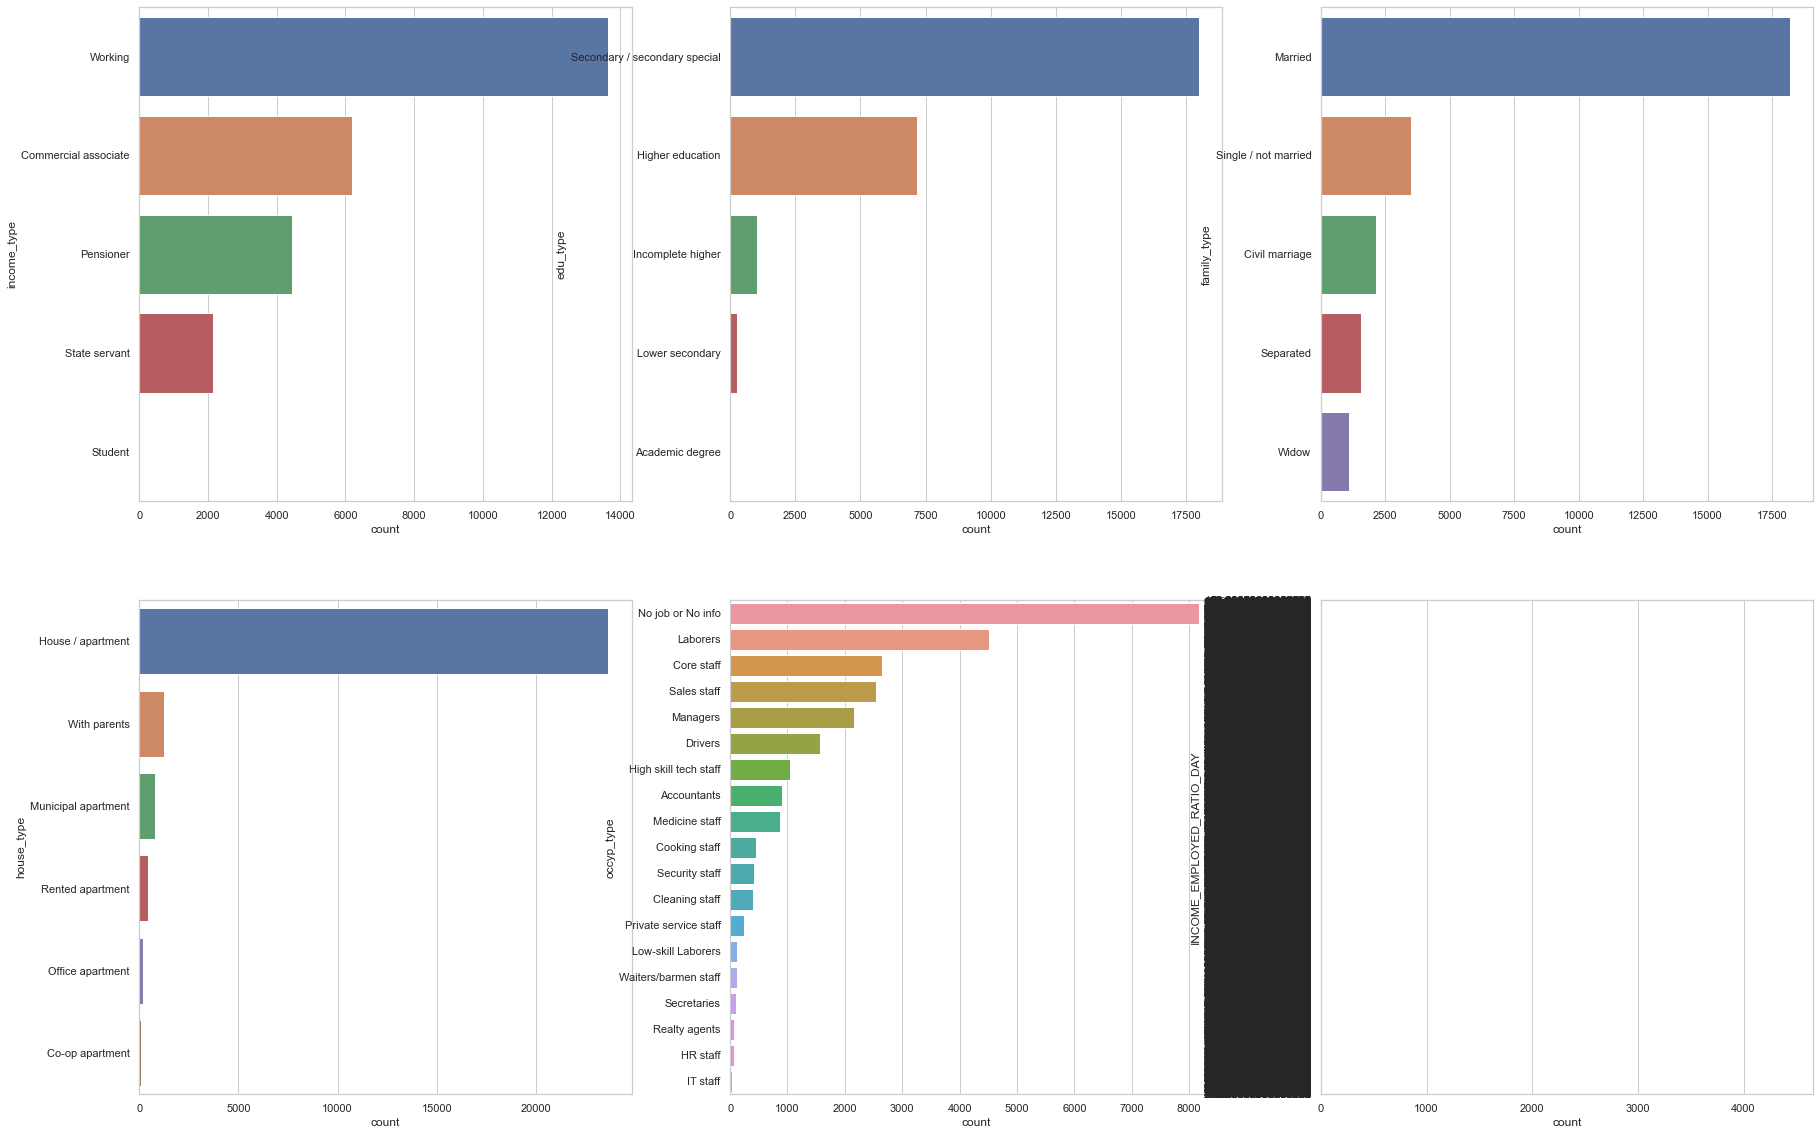

In [103]:
plt.figure(figsize = (30,20))

for i, column in enumerate(remain_cols):
    plt.subplot(2,3,i+1)
    sns.set_theme(style='whitegrid')
    sns.countplot(y=column, data=train, order=train[column].value_counts().index)
plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.show()

- 각 컬럼별 특징값들을 count가 적은 요소들을 묶어 줄일 수 있으나 앞에서 수치형처럼 값의 형태가 아니므로 유의미한 특징들이 있을 수 있다
- 일단은 그대로 사용하며 ordinal encoding을 통해 스케일링을 진행해야겠다.

#### 나머지 범주형 변수들을 ordinal encoding

In [67]:
#!pip install category_encoders
from category_encoders import OrdinalEncoder

remain_cols = ['income_type', 'family_type', 'house_type', 'occyp_type']
for target_col in remain_cols:
    encoder = OrdinalEncoder(cols=target_col)
    display(train[[target_col]].head())
    encoder.fit(train[target_col])
    display(encoder.transform(train[target_col]))
    train[target_col] = encoder.transform(train[target_col])
    
#!pip install category_encoders
from category_encoders import OrdinalEncoder

remain_cols = ['income_type', 'family_type', 'house_type', 'occyp_type']
for target_col in remain_cols:
    encoder = OrdinalEncoder(cols=target_col)
    display(test[[target_col]].head())
    encoder.fit(test[target_col])
    display(encoder.transform(test[target_col]))
    test[target_col] = encoder.transform(test[target_col])

,income_type
index,
0,Commercial associate
1,Commercial associate
2,Working
3,Commercial associate
4,State servant


,income_type
index,
0,1
1,1
2,2
3,1
4,3
...,...
26452,3
26453,2
26454,2


,family_type
index,
0,Married
1,Civil marriage
2,Married
3,Married
4,Married


,family_type
index,
0,1
1,2
2,1
3,1
4,1
...,...
26452,1
26453,3
26454,2


,house_type
index,
0,Municipal apartment
1,House / apartment
2,House / apartment
3,House / apartment
4,House / apartment


,house_type
index,
0,1
1,2
2,2
3,2
4,2
...,...
26452,2
26453,2
26454,3


,occyp_type
index,
0,NaN
1,Laborers
2,Managers
3,Sales staff
4,Managers


,occyp_type
index,
0,1
1,2
2,3
3,4
4,3
...,...
26452,6
26453,1
26454,6


,income_type
index,
26457,Pensioner
26458,State servant
26459,Working
26460,Commercial associate
26461,State servant


,income_type
index,
26457,1
26458,2
26459,3
26460,4
26461,2
...,...
36452,3
36453,3
36454,3


,family_type
index,
26457,Civil marriage
26458,Married
26459,Married
26460,Married
26461,Married


,family_type
index,
26457,1
26458,2
26459,2
26460,2
26461,2
...,...
36452,2
36453,1
36454,2


,house_type
index,
26457,House / apartment
26458,House / apartment
26459,House / apartment
26460,House / apartment
26461,House / apartment


,house_type
index,
26457,1
26458,1
26459,1
26460,1
26461,1
...,...
36452,1
36453,1
36454,1


,occyp_type
index,
26457,NaN
26458,Core staff
26459,Laborers
26460,Drivers
26461,Managers


,occyp_type
index,
26457,1
26458,2
26459,3
26460,4
26461,5
...,...
36452,8
36453,3
36454,10


#### 'edu_type'은 순위적 특성이 있으므로 mapping encoding을 통해 따로 스케일링

In [68]:
print('edu_type 종류 : ',list(train.edu_type.unique()))
display(train[['edu_type']].head())
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
train.edu_type = train.edu_type.map(edu_order)
display(train[['edu_type']].head())


print('edu_type 종류 : ',list(test.edu_type.unique()))
display(test[['edu_type']].head())
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
test.edu_type = test.edu_type.map(edu_order)
display(test[['edu_type']].head())

edu_type 종류 :  ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


,edu_type
index,
0,Higher education
1,Secondary / secondary special
2,Higher education
3,Secondary / secondary special
4,Higher education


,edu_type
index,
0,3
1,1
2,3
3,1
4,3


edu_type 종류 :  ['Secondary / secondary special', 'Higher education', 'Lower secondary', 'Incomplete higher', 'Academic degree']


,edu_type
index,
26457,Secondary / secondary special
26458,Higher education
26459,Secondary / secondary special
26460,Secondary / secondary special
26461,Higher education


,edu_type
index,
26457,1
26458,3
26459,1
26460,1
26461,3


In [70]:
train[cat_vars].head(1)

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,economical_people,INCOME_fam_RATIO,INCOME_child_num_RATIO,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,,,,,,,,,
0,0,0,0,1,3,1,1,1,43.002761,300.89153,1289.808917,15576.923077,2.0,101250.0,0.0,2,67500.0


---

In [108]:
train.head()

,gender,age,DAYS_BIRTH,car,reality,child_num,income_total,income_type,edu_type,family_type,...,credit,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,economical_people,INCOME_fam_RATIO,INCOME_child_num_RATIO,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,,,,,,,,,,,,,
0,0,3,13899,0,0,0,202500,1,3,1,...,1,43.002761,300.891530,1289.808917,15576.923077,2,101250.0,0.0,2,67500.0
1,0,3,11380,0,1,1,247500,1,1,2,...,1,160.714286,1119.909502,4759.615385,49500.000000,2,82500.0,247500.0,2,82500.0
2,1,5,19087,1,1,0,450000,2,3,1,...,2,101.488498,709.779180,3040.540541,34615.384615,2,225000.0,0.0,4,90000.0
3,0,4,15088,0,1,0,202500,1,1,1,...,0,96.797323,677.257525,2892.857143,33750.000000,2,101250.0,0.0,3,50625.0
4,0,4,15037,1,1,0,157500,3,3,1,...,2,74.821853,523.255814,2218.309859,26250.000000,2,78750.0,0.0,3,39375.0


In [109]:
train.columns

Index(['gender', 'age', 'DAYS_BIRTH', 'car', 'reality', 'child_num',
       'income_total', 'income_type', 'edu_type', 'family_type', 'house_type',
       'DAYS_EMPLOYED', 'DAYS_EMPLOYED_WEEK', 'DAYS_EMPLOYED_MONTH',
       'DAYS_EMPLOYED_YEAR', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'begin_year', 'credit',
       'INCOME_EMPLOYED_RATIO_DAY', 'INCOME_EMPLOYED_RATIO_WEEK',
       'INCOME_EMPLOYED_RATIO_MONTH', 'INCOME_EMPLOYED_RATIO_YEAR',
       'economical_people', 'INCOME_fam_RATIO', 'INCOME_child_num_RATIO',
       'GET_JOB_AGE', 'income_per_days_birth'],
      dtype='object')

In [110]:
train['credit']

index
0        1
1        1
2        2
3        0
4        2
        ..
26452    1
26453    2
26454    2
26455    2
26456    2
Name: credit, Length: 26451, dtype: int64

In [113]:
train.to_csv('../data/신용카드/train_ver1.csv', index=False)

In [71]:
test.head()

,gender,age,DAYS_BIRTH,car,reality,child_num,income_total,income_type,edu_type,family_type,...,begin_year,INCOME_EMPLOYED_RATIO_DAY,INCOME_EMPLOYED_RATIO_WEEK,INCOME_EMPLOYED_RATIO_MONTH,INCOME_EMPLOYED_RATIO_YEAR,economical_people,INCOME_fam_RATIO,INCOME_child_num_RATIO,GET_JOB_AGE,income_per_days_birth
index,,,,,,,,,,,,,,,,,,,,,
26457,1,6,21990,1,0,0,112500,1,1,1,...,6,0.000000,112500.000000,112500.000000,112500.000000,2,56250.0,0.0,6,18750.0
26458,0,5,18964,0,1,0,135000,2,3,2,...,4,15.569139,108.958838,465.517241,5625.000000,2,67500.0,0.0,2,27000.0
26459,0,4,15887,0,1,0,69372,3,1,2,...,4,319.686636,2167.875000,8671.500000,69372.000000,2,34686.0,0.0,4,17343.0
26460,1,5,19270,1,0,0,112500,4,1,2,...,4,44.448834,310.773481,1323.529412,16071.428571,2,56250.0,0.0,4,22500.0
26461,0,4,17822,1,1,0,225000,2,3,2,...,1,23.974427,167.785235,718.849840,8653.846154,2,112500.0,0.0,2,56250.0


In [72]:
test.to_csv('../data/신용카드/test_ver1.csv', index=False)

In [1]:
#!pip install jupyter_contrib_nbextensions

In [2]:
#!jupyter contrib nbextension install --user